In the following notebook the data.txt file will be explored and the results will be plotted

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read the text file into a DataFrame
df = pd.read_csv("TANGANYIKAhitdatarandom_10kHz.txt", delimiter='\t')

In [26]:
# extract each column as a list
neutrino_depth = df['Neutrino Depth [m]'].tolist()
neutrino_direct_angle = df['Neutrino Direct Angle [degrees]'].tolist()
hydrophone_depth = df['Hydrophone Depth [m]'].tolist()
hydrophone_distance = df['Hydrophone Distance [m]'].tolist()
time_of_arrival = df['Time of Arrival [s]'].tolist()
signal_amplitude = df['Signal Amplitude'].tolist()
angle_of_departure = df['Angle of Departure [degrees]'].tolist()
angle_of_departure = [-1 * i for i in angle_of_departure]
angle_of_arrival = df['Angle of Arrival [degrees]'].tolist()
surface_bounces = df['Surface Bounces'].tolist()
bottom_bounces = df['Bottom Bounces'].tolist()

# make the lists into an arrays
neutrino_depth_array = np.array(neutrino_depth)
neutrino_direct_angle_array = np.array(neutrino_direct_angle)
hydrophone_depth_array = np.array(hydrophone_depth)
hydrophone_distance_array = np.array(hydrophone_distance)
time_of_arrival_array = np.array(time_of_arrival)
signal_amplitude_array = np.array(signal_amplitude)
angle_of_departure_array = np.array(angle_of_departure)
angle_of_arrival_array = np.array(angle_of_arrival)
surface_bounces_array = np.array(surface_bounces)
bottom_bounces_array = np.array(bottom_bounces)

In [4]:
# plot the location of the neutrino sources and neutrino hits
plt.figure(figsize=(8,6))

neutrino_x = np.zeros(len(neutrino_depth_array))

# add the data points
plt.scatter(neutrino_x, neutrino_depth_array, color='orange', s=0.1, label='Neutrino Location')
plt.scatter(hydrophone_distance_array, hydrophone_depth_array, color='deepskyblue', s=0.1, label='Hydrophone Location')

# give names to axes
plt.title('Overview Simulation')
plt.xlabel('Distance [m]')
plt.ylabel('Depth [m]')

# add the sea floor and surface
plt.axhline(1500, color='brown', label='Sea Floor')
plt.axhline(1510, color='brown')
plt.axhline(1520, color='brown')
plt.axhline(1530, color='brown')
plt.axhline(1540, color='brown')
plt.axhline(1550, color='brown')

plt.axhline(0, color='dodgerblue', label='Sea Surface')

# add a y limit
plt.ylim(-500, 1551)

# add a legend
plt.legend(loc='upper right')

plt.gca().invert_yaxis()

In [5]:
# plot the incoming angle vs. the outgoing angle
plt.figure(figsize=(8, 6))

# scatter plot with two dimensions
sc = plt.scatter(angle_of_departure, angle_of_arrival, c=hydrophone_depth, cmap='viridis', s=1, alpha=0.5)

# add labels and title
plt.xlabel('Outgoing Angle [degrees]')
plt.ylabel('Incoming Angle [degrees]')
plt.title('Tanganyika: Outgoing Angle vs Incoming Angle')

# Set major and minor ticks
major_tick_interval = 15
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Hydrophone Depth [m]')
cbar.ax.invert_yaxis()

# show plot
plt.show()

In [7]:
# plot the incoming angle vs. the outgoing angle
plt.figure(figsize=(8, 6))

# scatter plot with two dimensions
sc = plt.scatter(angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)], angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)], c=hydrophone_distance_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)], cmap='viridis', s=1, alpha=0.5)

# add labels and title
plt.xlabel('Angle of Emittance [degrees]')
plt.ylabel('Angle of Arrival [degrees]')
plt.title('Tanganyika: Angle of Emittance vs Angle of Arrival')

# Set major and minor ticks
major_tick_interval = 15
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Hydrophone Distance [m]')
cbar.ax.invert_yaxis()

# show plot
plt.savefig("outgoing vs. incoming angle.jpg")
plt.show()

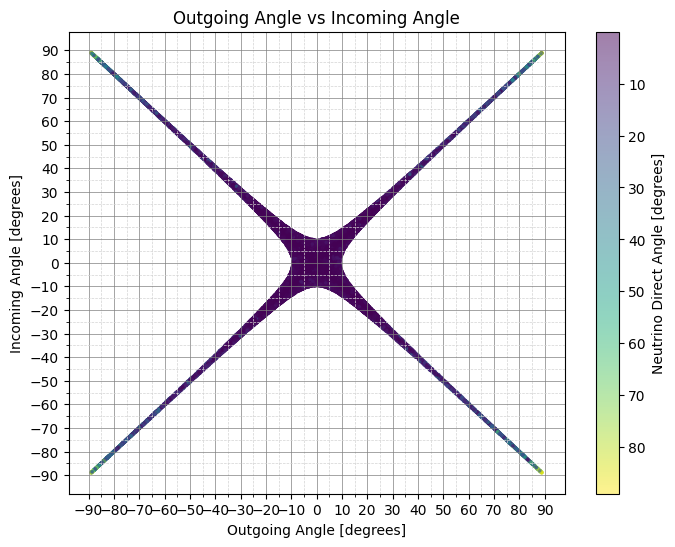

In [10]:
# plot the incoming angle vs. the outgoing angle
plt.figure(figsize=(8, 6))

# scatter plot with two dimensions
sc = plt.scatter(angle_of_departure, angle_of_arrival, c=neutrino_direct_angle, cmap='viridis', s=3, alpha=0.5)

# add labels and title
plt.xlabel('Outgoing Angle [degrees]')
plt.ylabel('Incoming Angle [degrees]')
plt.title('Outgoing Angle vs Incoming Angle')

# Set major and minor ticks
major_tick_interval = 10
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Neutrino Direct Angle [degrees]')
cbar.ax.invert_yaxis()

# show plot
plt.show()

In [43]:
# create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with three dimensions
sc = ax.scatter(angle_of_departure, angle_of_arrival, hydrophone_distance, c=hydrophone_depth, cmap='viridis', s=5, alpha=0.5)

# add labels and title
ax.set_xlabel('Outgoing Angle [degrees]')
ax.set_ylabel('Incoming Angle [degrees]')
ax.set_zlabel('Hydrophone Distance [m]')
ax.set_title('3D Scatter Plot: Outgoing Angle vs Incoming Angle vs Hydrophone Distance')

# set major and minor ticks
major_tick_interval = 10
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Hydrophone Depth [m]')
cbar.ax.invert_yaxis()

plt.savefig("3D outgoing vs. incoming angle.jpg")


# show plot
plt.show()

In [11]:
# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(7, 5))

# determine the width of the bins
bin_width = 1

# calculate the half-width to center the bars
half_width = bin_width / 2

# calculate the bin edges
bin_edges = [x - half_width for x in range(0, 40, 1)]

# plot the histogram
plt.hist(time_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)], bins=bin_edges, color='deepskyblue', edgecolor='dodgerblue', width=bin_width)

# set major and minor ticks
ymajor_tick_interval = 100
yminor_tick_interval = 50

plt.yticks(range(0, 850, ymajor_tick_interval))
plt.yticks(range(0, 850, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add labels and title
plt.xlabel('Time of Arrival [s]')
plt.ylabel('Entries [$s^{-1}$]')
plt.title('Tanganyika: Time of Arrival')

plt.savefig("time_of_arrival_Tanganyika.jpg")

# Show plot
plt.show()



print(time_of_arrival_array)

[14.8841991 14.1077089 14.0612354 ... 25.2709656 25.4024258 25.995327 ]


In [13]:
# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(8, 6))

# determine the width of the bins
bin_width = 100

# calculate the half-width to center the bars
half_width = bin_width / 2

# calculate the bin edges
bin_edges = [x - half_width for x in range(0, 4001, 100)]

# plot the histogram
plt.hist(hydrophone_depth, bins=bin_edges, color='deepskyblue', edgecolor='dodgerblue', width=bin_width)

# set major and minor ticks
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.yticks(range(0, 10000, ymajor_tick_interval))
plt.yticks(range(0, 10000, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

plt.xscale("linear")
# add labels and title
plt.xlabel('Hydrophone Depth [m]')
plt.ylabel('Frequency')
plt.title('Number of Detections per Depth')
#plt.ylim(3900, 4100)

# Show plot
plt.show()

[-50.0, 50.0, 150.0, 250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650.0, 1750.0, 1850.0, 1950.0, 2050.0, 2150.0, 2250.0, 2350.0, 2450.0, 2550.0, 2650.0, 2750.0, 2850.0, 2950.0, 3050.0, 3150.0, 3250.0, 3350.0, 3450.0, 3550.0, 3650.0, 3750.0, 3850.0, 3950.0]
100


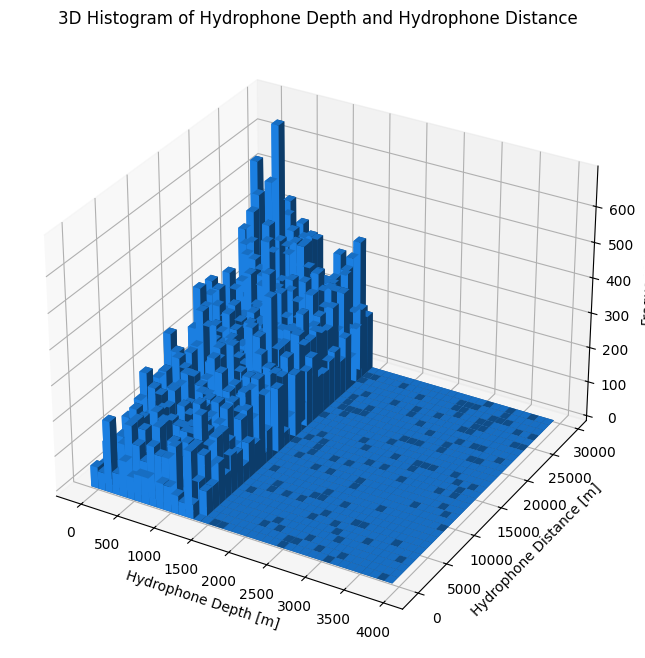

In [14]:
example = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(0, 30001, 1000)]

print(bin_edges)
# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth, hydrophone_distance, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
print(dx)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='dodgerblue')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance')

# Show plot
plt.show()

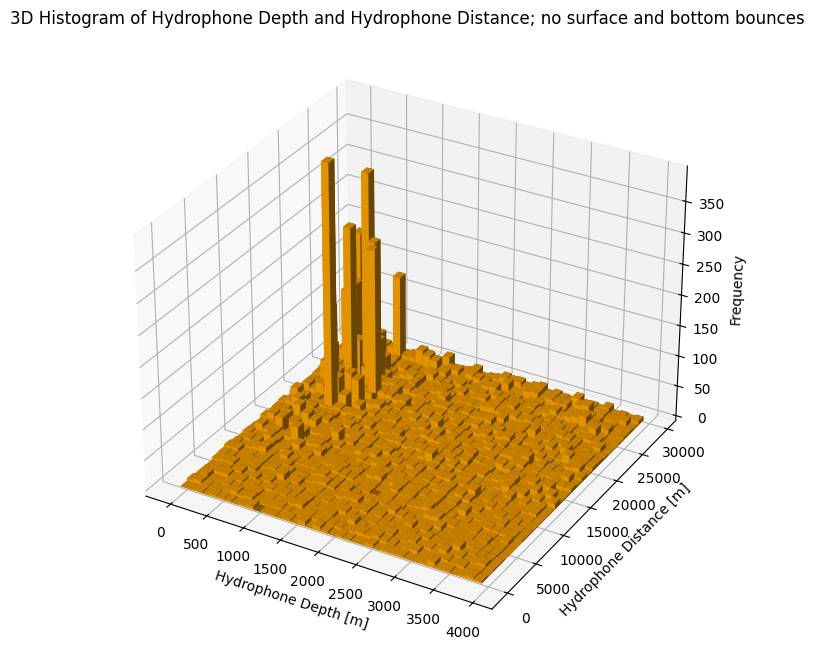

In [13]:
hydrophone_depth_clean = hydrophone_depth_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
hydrophone_distance_clean = hydrophone_distance_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(0, 30001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_clean, hydrophone_distance_clean, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='orange')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance; no surface and bottom bounces')

# Show plot
plt.show()

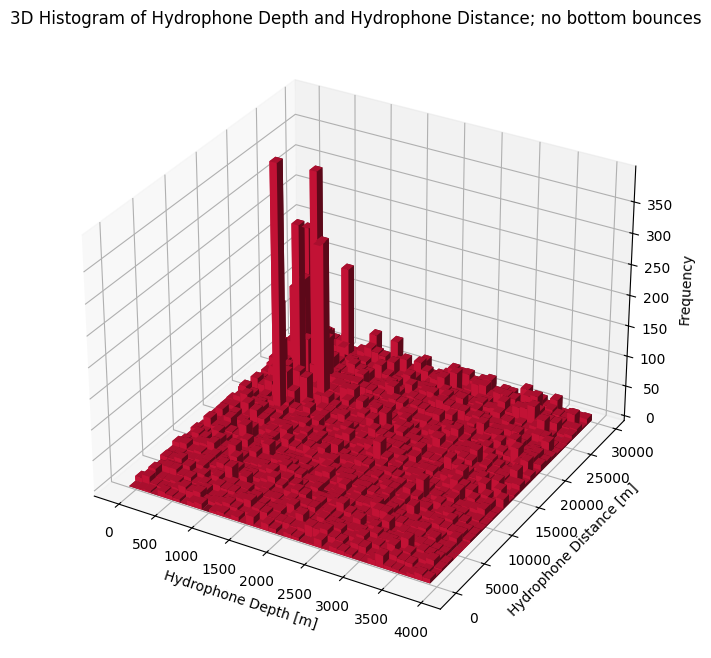

In [14]:
hydrophone_depth_no_bottom = hydrophone_depth_array[(bottom_bounces_array == 0)]
hydrophone_distance_no_bottom = hydrophone_distance_array[(bottom_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(0, 30001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_no_bottom, hydrophone_distance_no_bottom, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='crimson')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance; no bottom bounces')

# Show plot
plt.show()

100


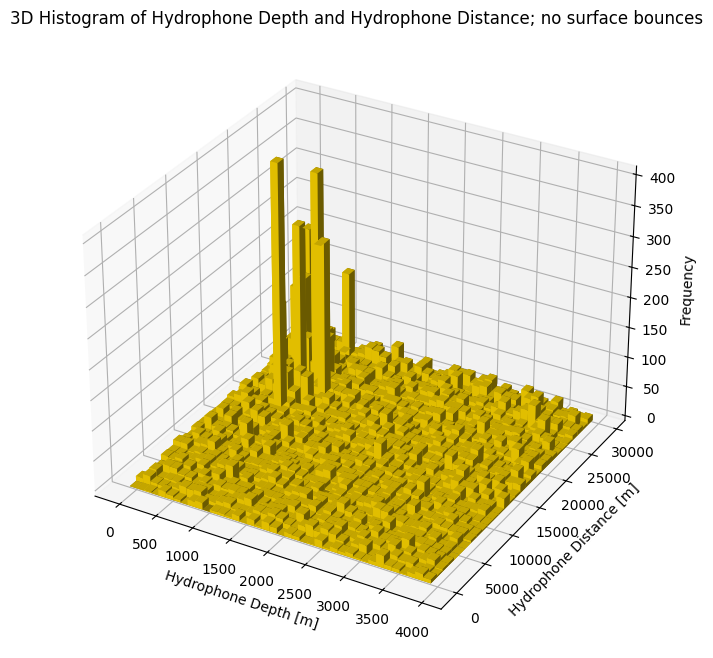

In [15]:
hydrophone_depth_no_surface = hydrophone_depth_array[(surface_bounces_array == 0)]
hydrophone_distance_no_surface = hydrophone_distance_array[(surface_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(0, 30001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_no_surface, hydrophone_distance_no_surface, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
print(dx)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='gold')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance; no surface bounces')

# Show plot
plt.show()

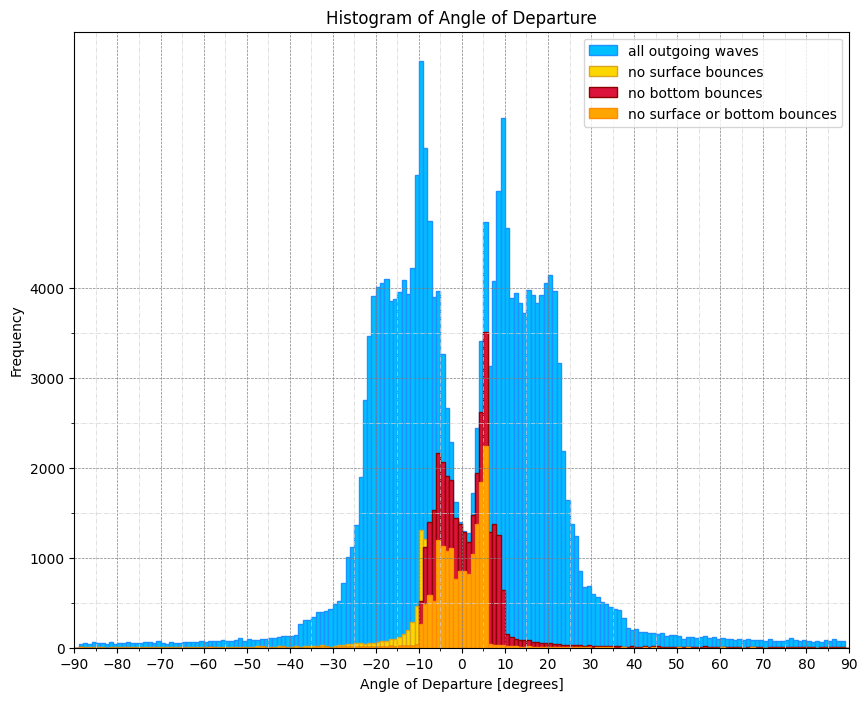

In [6]:
angle_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0)]
angle_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(10, 8))
plt.hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_departure_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_departure_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_departure_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# add labels and title
plt.xlabel('Angle of Departure [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Angle of Departure')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 4001, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 4001, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add x limits
plt.xlim(-90, 90)

# plot legend
plt.legend()

# show plot
plt.show()

[   0   12    9    4    4    6    4    1    9    7    6   10    7    6
    7    5    3   10    7   10    6    8   12    5    6   10    7    8
    6    9    4   15    7    5    8   11   12   11   14    7   10   11
   15   20    7   13    5   16   27   12   12   21   15   20   16   19
   24   29   28   13   23   36   30   46   44   52   61   49   59   55
   68   81   82  109  106  136  173  213  306  494 1820 2327 2575 2450
 3687 3378 3128 3061 2240 2236 2144 1994 2523 3327 4470 5754 1334 1404
 1281  672  172  138  114   95   90   96   68   66   57   56   58   42
   48   35   30   30   39   36   28   39   17   27   25   20   25   15
   16   14   11   18   13   14   24    8   19   20   10   11   13   12
   16    3   14   12    4    6   17    5   10    7   12    8    9    4
    8    2   10    7   11    8    2    5    7   10    7    8    7    7
    6    8    4    3    1    6   12    5    7    7    6    0    0]


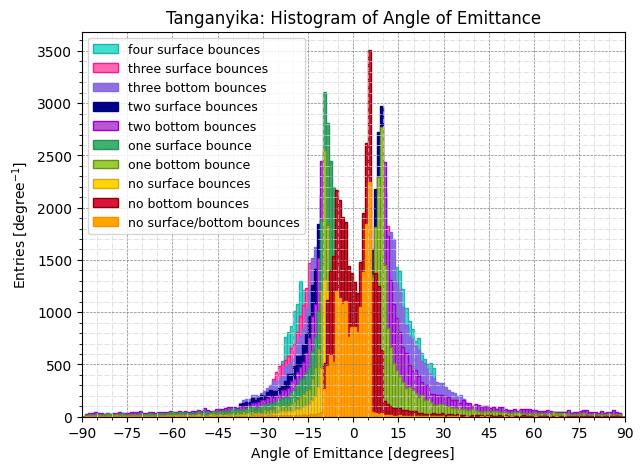

In [13]:
angle_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0)]
angle_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0)]
angle_of_departure_1_surface = angle_of_departure_array[(surface_bounces_array == 1)]
angle_of_departure_1_bottom = angle_of_departure_array[(bottom_bounces_array == 1)]
angle_of_departure_2_surface = angle_of_departure_array[(surface_bounces_array == 2)]
angle_of_departure_2_bottom = angle_of_departure_array[(bottom_bounces_array == 2)]
angle_of_departure_3_surface = angle_of_departure_array[(surface_bounces_array == 3)]
angle_of_departure_3_bottom = angle_of_departure_array[(bottom_bounces_array == 3)]
angle_of_departure_4_surface = angle_of_departure_array[(surface_bounces_array == 4)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(7, 5))
#plt.hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_departure_4_surface, bins=range(-90, 91), color='turquoise', edgecolor='lightseagreen', label='four surface bounces')
plt.hist(angle_of_departure_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(angle_of_departure_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(angle_of_departure_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(angle_of_departure_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(angle_of_departure_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(angle_of_departure_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
plt.hist(angle_of_departure_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_departure_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_departure_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

# Calculate the histogram counts for the orange histogram
counts1, bin_edges = np.histogram(angle_of_departure_no_bottom, bins=range(-90, 92))
counts, bin_edges = np.histogram(angle_of_departure_no_surface, bins=range(-90, 92))
print(counts + counts1)

# add labels and title
plt.xlabel('Angle of Emittance [degrees]')
plt.ylabel('Entries [degree$^{-1}$]')
plt.title('Tanganyika: Histogram of Angle of Emittance')

# set major and minor ticks
xmajor_tick_interval = 15
xminor_tick_interval = 5
ymajor_tick_interval = 500
yminor_tick_interval = 100

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 3601, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 3601, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add x limits
plt.xlim(-90, 90)

# plot legend
plt.legend(fontsize=9, loc="upper left")
plt.savefig("Histogram AoD Tanganyika.jpg")

# show plot
plt.show()

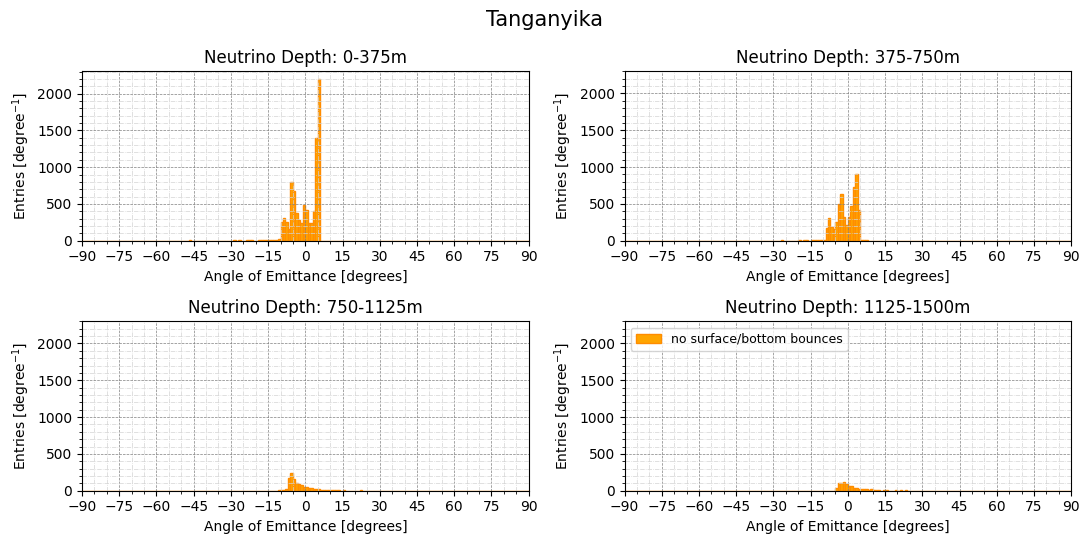

In [15]:
# define the neutrino depths
depths = [375, 750, 1125, 1500]                                 

# create a 3x4 panelled plot
fig, axes = plt.subplots(2, 2, figsize=(11, 5.5))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):

    if depth == 375:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[neutrino_depth_array < depth]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (neutrino_depth_array < depth)]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (neutrino_depth_array < depth)]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (neutrino_depth_array < depth)]

    else:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[(neutrino_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (neutrino_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (neutrino_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (neutrino_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    #axes[row_idx, col_idx].hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(angles_of_departure, bins=range(-90, 91), color='blue', edgecolor='blue', label='others')
    #axes[row_idx, col_idx].hist(angles_of_departure_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    #axes[row_idx, col_idx].hist(angles_of_departure_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(angles_of_departure_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Angle of Emittance [degrees]')
    axes[row_idx, col_idx].set_ylabel('Entries [degree$^{-1}$]')

    if depth == 375:
        axes[row_idx, col_idx].set_title(f'Neutrino Depth: 0-{depth}m')

    else:
        axes[row_idx, col_idx].set_title(f'Neutrino Depth: {depths[idx - 1]}-{depth}m')

    if depth == 1500:
        axes[row_idx, col_idx].legend(fontsize=9, loc='upper left')
        
    # set major and minor ticks
    xmajor_tick_interval = 15
    xminor_tick_interval = 5
    ymajor_tick_interval = 500
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 2301, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 2301, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()
plt.savefig("Histogram Depth AoD Tanganyika.jpg")

# show plot
plt.show()

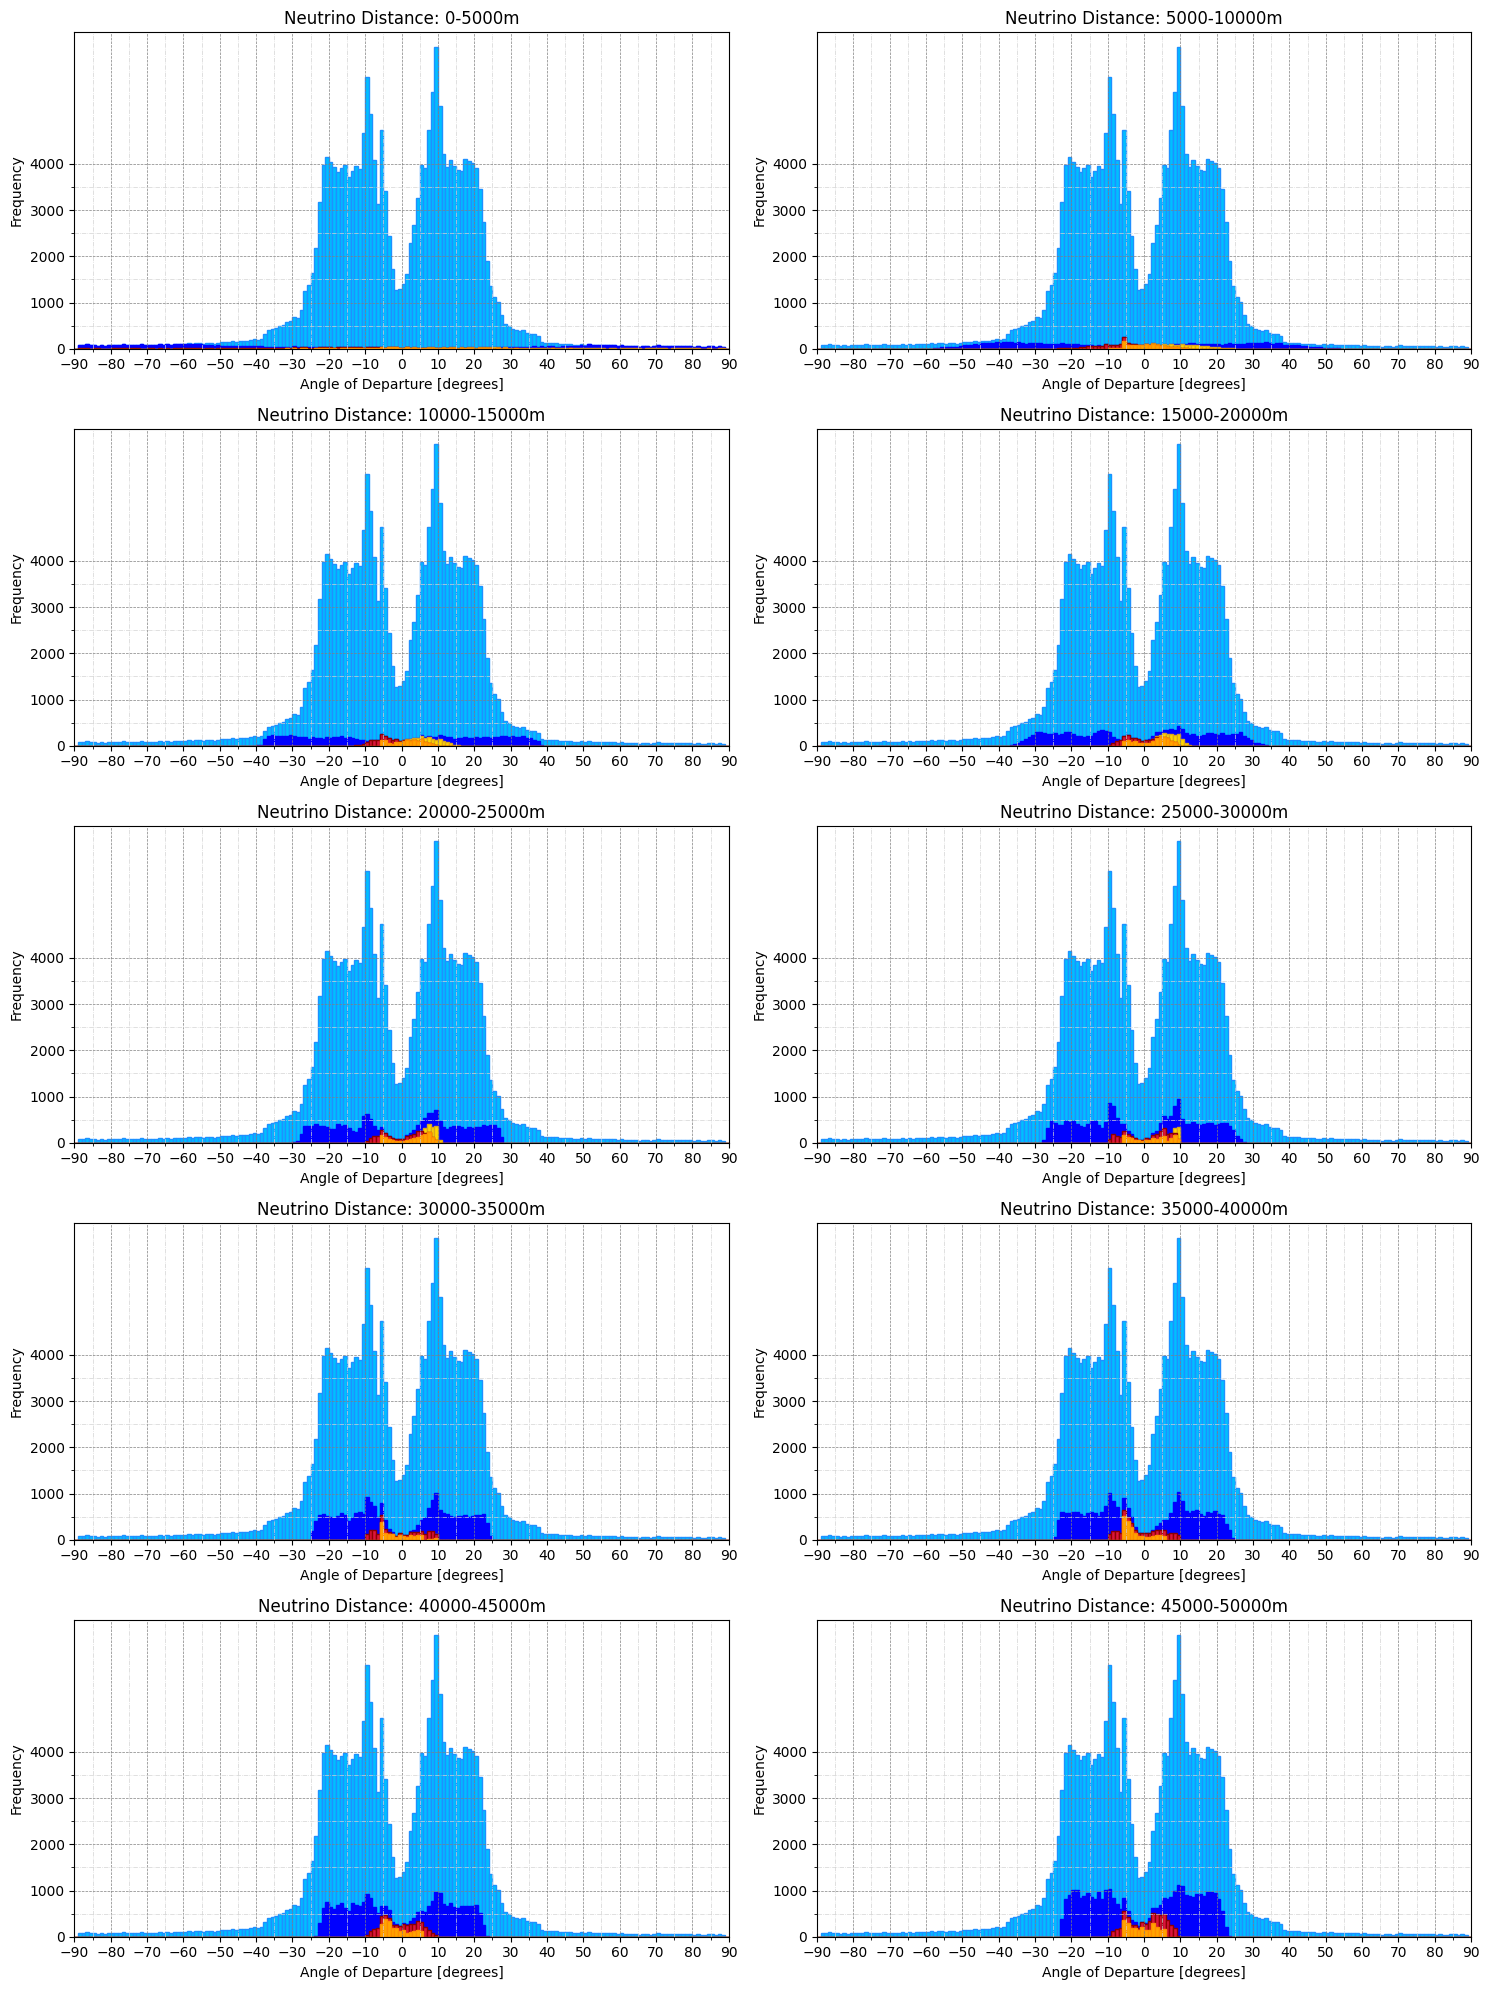

In [18]:
# define the neutrino depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):

    if distance == 5000:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[hydrophone_distance_array < distance]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance)]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

    else:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[(hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(angles_of_departure, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(angles_of_departure_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(angles_of_departure_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(angles_of_departure_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Depth {depth}m')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Angle of Departure [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')

    if distance == 5000:
        axes[row_idx, col_idx].set_title(f'Neutrino Distance: 0-{distance}m')
    else:
        axes[row_idx, col_idx].set_title(f'Neutrino Distance: {distances[idx - 1]}-{distance}m')
       
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 1000
    yminor_tick_interval = 500
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 4001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 4001, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

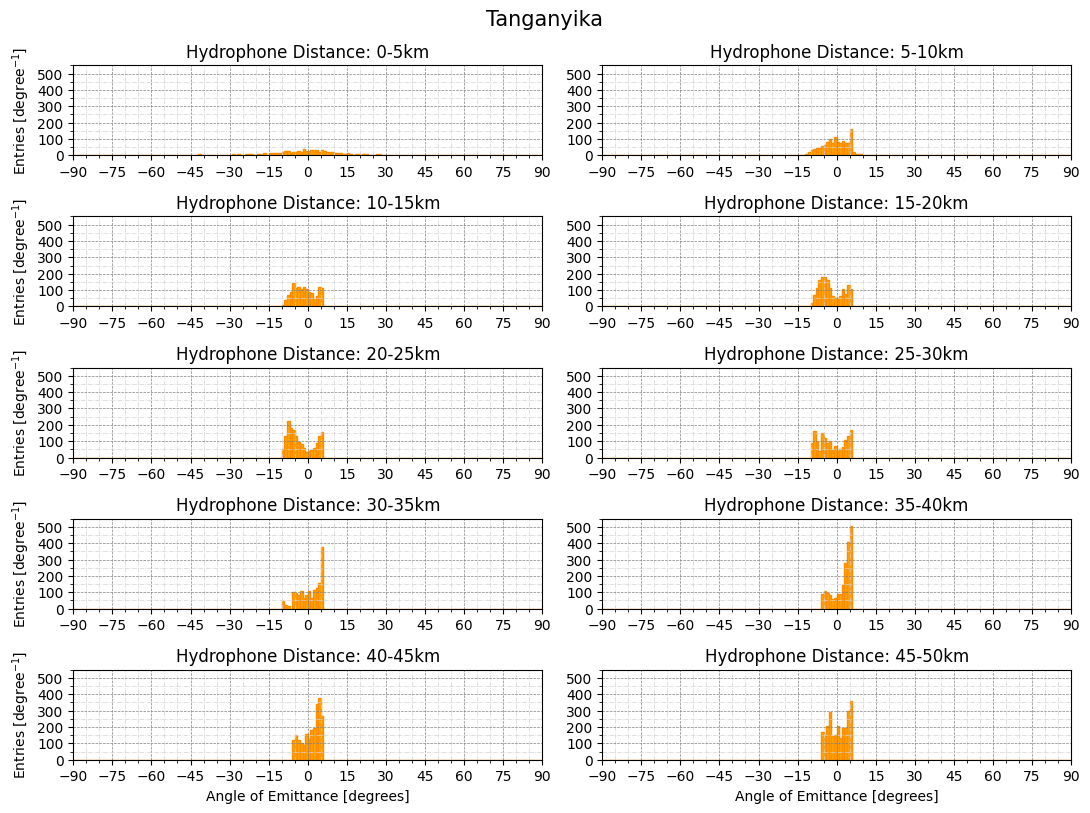

In [24]:
# define the neutrino depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]     

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(11, 8.25))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):

    if distance == 5000:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[hydrophone_distance_array < distance]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance)]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

    else:
        # filter out pancake angles for the current depth
        angles_of_departure = angle_of_departure_array[(hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        angles_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(angles_of_departure, bins=range(-90, 91), color='blue', edgecolor='blue', label='others')
    #axes[row_idx, col_idx].hist(angles_of_departure_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    #axes[row_idx, col_idx].hist(angles_of_departure_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(angles_of_departure_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

    if distance == 5000:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: 0-{round(distance/1000)}km')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: {round(distances[idx - 1]/1000)}-{round(distance/1000)}km')

    if distance == 50000 or distance == 45000:
        axes[row_idx, col_idx].set_xlabel('Angle of Emittance [degrees]')

    if distance == 5000 or distance == 15000 or distance == 25000 or distance == 35000 or distance == 45000:
        axes[row_idx, col_idx].set_ylabel('Entries [degree$^{-1}$]')
        
    # set major and minor ticks
    xmajor_tick_interval = 15
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 551, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 551, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()
plt.savefig("Histogram Distance AoD Tanganyika.jpg")

# show plot
plt.show()

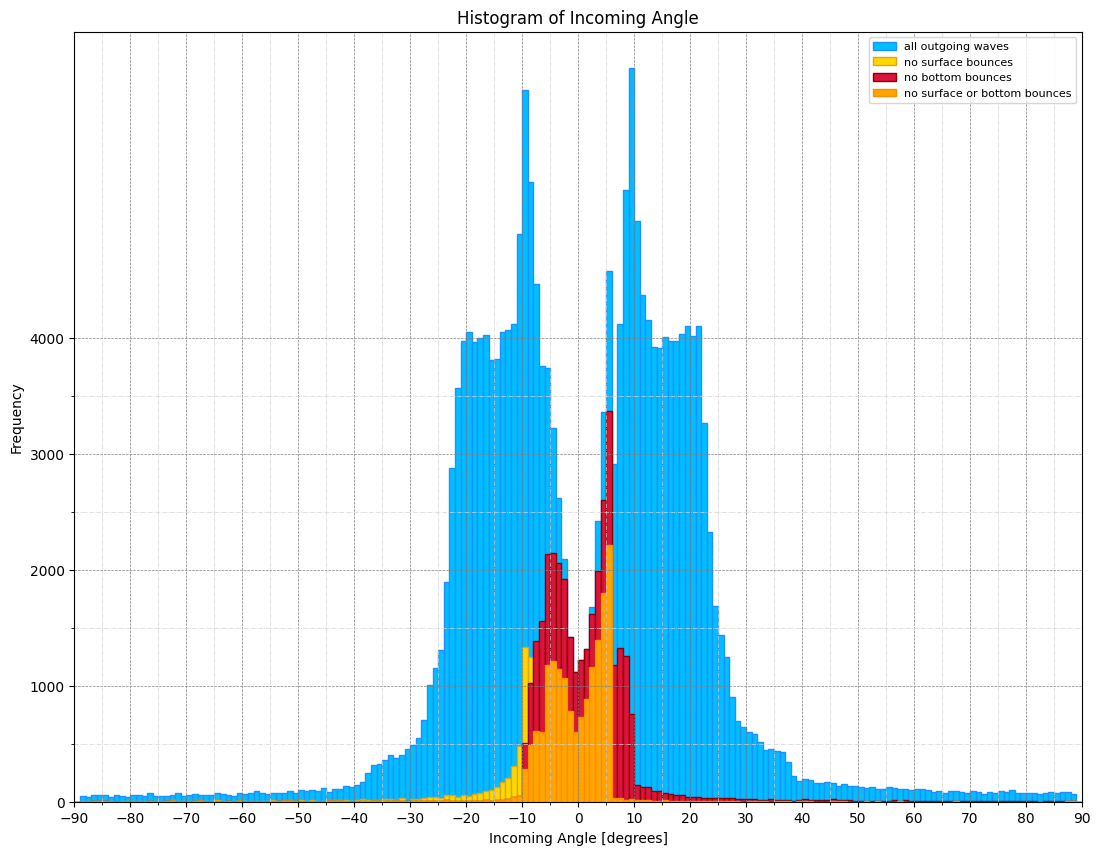

In [20]:
angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_arrival_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_arrival_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_arrival_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# add labels and title
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Incoming Angle')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 4001, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 4001, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add x limits
plt.xlim(-90, 90)

# add legend
plt.legend(fontsize=8)

# show plot
plt.show()

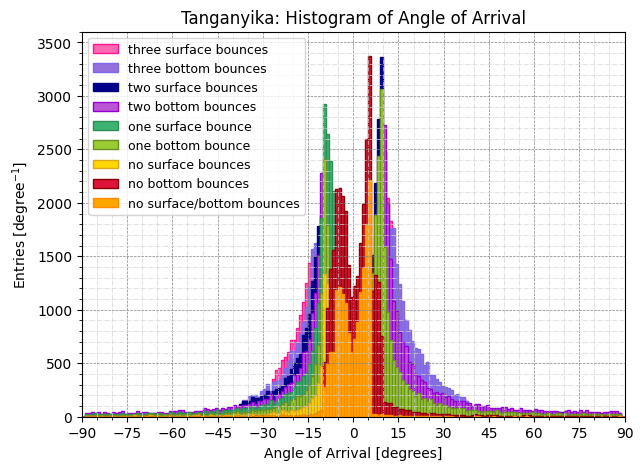

In [25]:
angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]
angle_of_arrival_1_surface = angle_of_arrival_array[(surface_bounces_array == 1)]
angle_of_arrival_1_bottom = angle_of_arrival_array[(bottom_bounces_array == 1)]
angle_of_arrival_2_surface = angle_of_arrival_array[(surface_bounces_array == 2)]
angle_of_arrival_2_bottom = angle_of_arrival_array[(bottom_bounces_array == 2)]
angle_of_arrival_3_surface = angle_of_arrival_array[(surface_bounces_array == 3)]
angle_of_arrival_3_bottom = angle_of_arrival_array[(bottom_bounces_array == 3)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(7, 5))
#plt.hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_arrival_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(angle_of_arrival_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(angle_of_arrival_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(angle_of_arrival_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(angle_of_arrival_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(angle_of_arrival_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
plt.hist(angle_of_arrival_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_arrival_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_arrival_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

# add labels and title
plt.xlabel('Angle of Arrival [degrees]')
plt.ylabel('Entries [degree$^{-1}$]')
plt.title('Tanganyika: Histogram of Angle of Arrival')

# set major and minor ticks
xmajor_tick_interval = 15
xminor_tick_interval = 5
ymajor_tick_interval = 500
yminor_tick_interval = 100

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 3601, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 3601, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add x limits
plt.xlim(-90, 90)

# add legend
plt.legend(fontsize=9, loc="upper left")

plt.savefig("Histogram IA Tanganyika.jpg")

# show plot
plt.show()

In [22]:
# filter out incoming angles for hydrophone at 400 meters depth
incoming_angles_400m = angle_of_arrival_array[hydrophone_depth_array == 400]
incoming_angles_500m = angle_of_arrival_array[hydrophone_depth_array == 500]
incoming_angles_600m = angle_of_arrival_array[hydrophone_depth_array == 600]
incoming_angles_700m = angle_of_arrival_array[hydrophone_depth_array == 700]
incoming_angles_800m = angle_of_arrival_array[hydrophone_depth_array == 800]
incoming_angles_900m = angle_of_arrival_array[hydrophone_depth_array == 900]
incoming_angles_1000m = angle_of_arrival_array[hydrophone_depth_array == 1000]
incoming_angles_1100m = angle_of_arrival_array[hydrophone_depth_array == 1100]
incoming_angles_1200m = angle_of_arrival_array[hydrophone_depth_array == 1200]
incoming_angles_1300m = angle_of_arrival_array[hydrophone_depth_array == 1300]
incoming_angles_1400m = angle_of_arrival_array[hydrophone_depth_array == 1400]

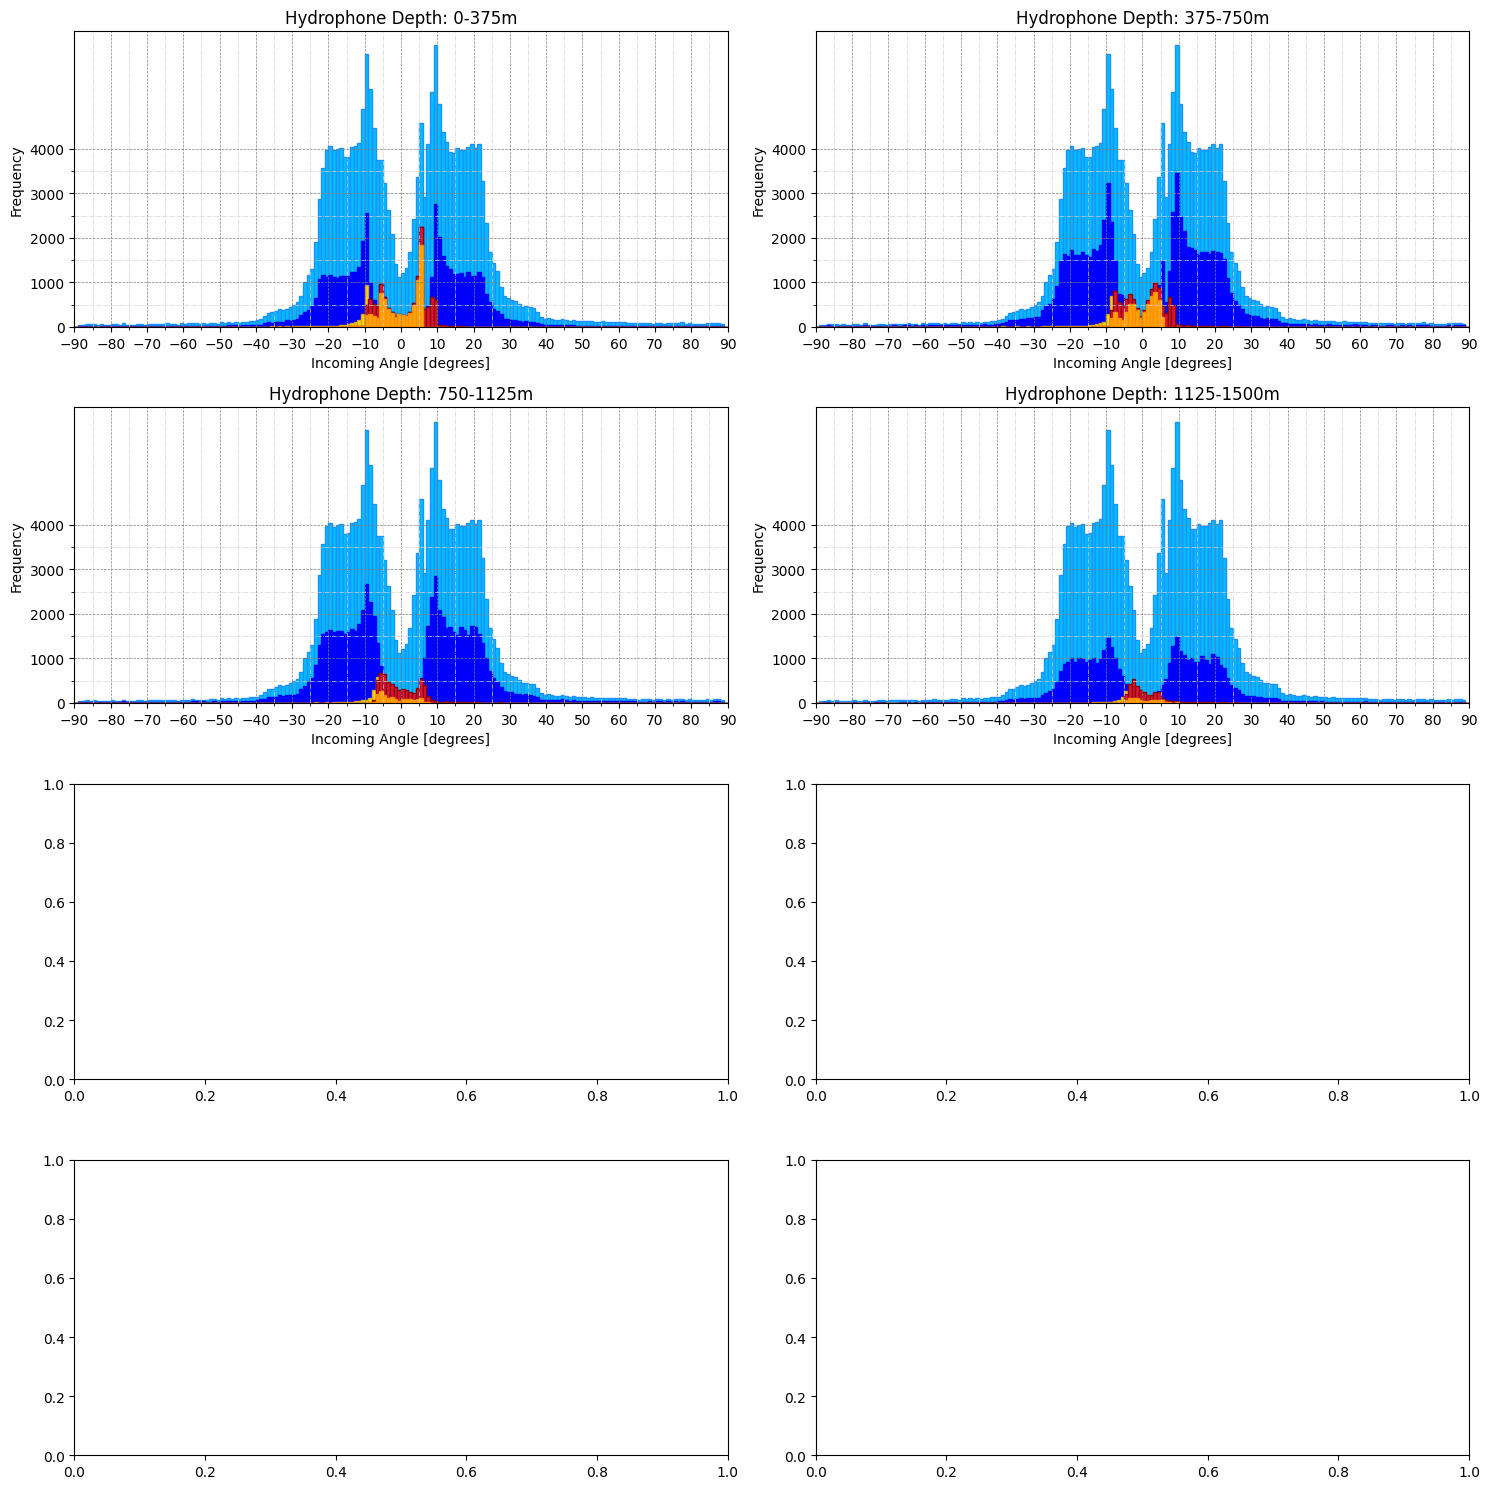

In [60]:
# define the neutrino depths
depths = [375, 750, 1125, 1500]                                 

# create a 3x4 panelled plot
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):

    if depth == 375:
        # filter out incoming angles for the current depth
        incoming_angles = angle_of_arrival_array[hydrophone_depth_array < depth]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array < depth)]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
    
    else:
        # filter out pancake angles for the current depth
        incoming_angles = angle_of_arrival_array[(hydrophone_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(angle_of_arrival_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Depth {depth}m')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Incoming Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')

    if depth == 375:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: 0-{depth}m')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: {depths[idx - 1]}-{depth}m')
       
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 1000
    yminor_tick_interval = 500
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 4001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 4001, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

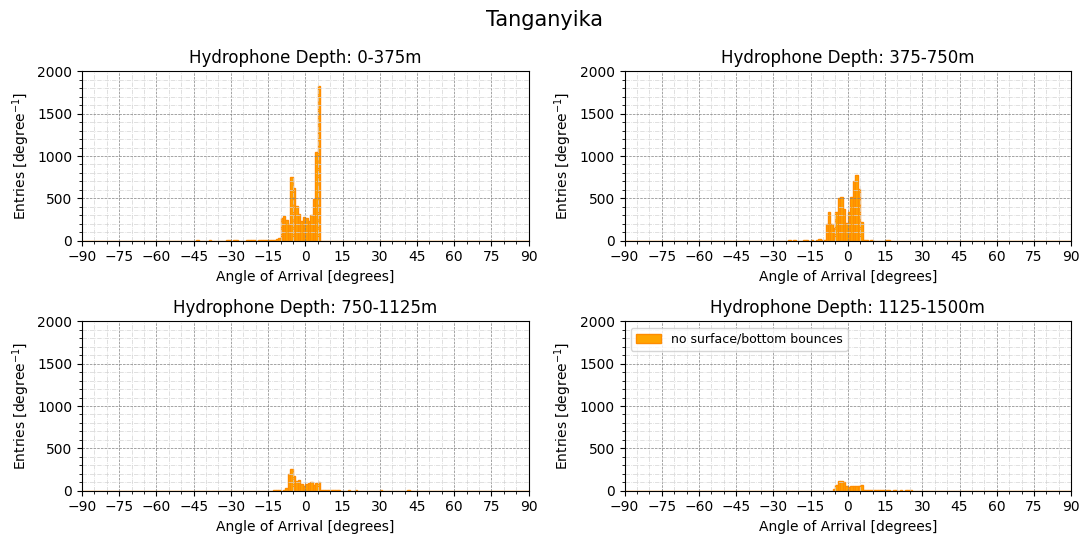

In [28]:
# define the neutrino depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]  

# create a 3x4 panelled plot
fig, axes = plt.subplots(2, 2, figsize=(11, 5.5))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):

    if depth == 375:
        # filter out incoming angles for the current depth
        incoming_angles = angle_of_arrival_array[hydrophone_depth_array < depth]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array < depth)]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
    
    else:
        # filter out pancake angles for the current depth
        incoming_angles = angle_of_arrival_array[(hydrophone_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(angle_of_departure_array, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label='others')
    #axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    #axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Angle of Arrival [degrees]')
    axes[row_idx, col_idx].set_ylabel('Entries [degree$^{-1}$]')

    if depth == 375:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: 0-{depth}m')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: {depths[idx - 1]}-{depth}m')
    if depth == 1500:
        axes[row_idx, col_idx].legend(fontsize=9, loc='upper left')

    # set major and minor ticks
    xmajor_tick_interval = 15
    xminor_tick_interval = 5
    ymajor_tick_interval = 500
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 2001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 2001, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()
plt.savefig("Histogram Depth IA Tanganyika.jpg")
# show plot
plt.show()

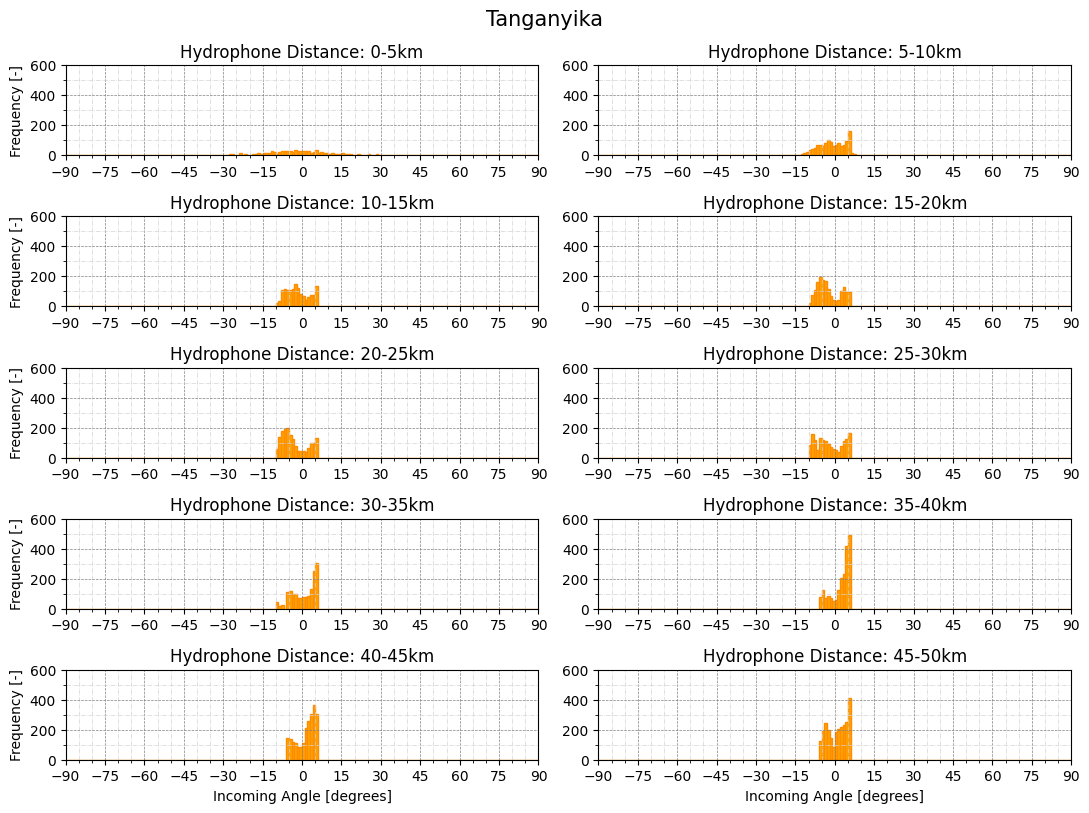

In [29]:
# define the depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(11, 8.25))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    
    if distance == 5000:
        # filter out pancake angles for the current depth
        incoming_angles = angle_of_arrival_array[hydrophone_distance_array < distance]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance)]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

    else:
        # filter out pancake angles for the current depth
        incoming_angles = angle_of_arrival_array[(hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'10 * Distance {distance}m')
    #axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    #axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Distance {distance}m')         
    

    if distance == 5000:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: 0-{round(distance/1000)}km')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: {round(distances[idx - 1]/1000)}-{round(distance/1000)}km')

    if distance == 50000 or distance == 45000:
        axes[row_idx, col_idx].set_xlabel('Angle of Arrival [degrees]')

    if distance == 5000 or distance == 15000 or distance == 25000 or distance == 35000 or distance == 45000:
        axes[row_idx, col_idx].set_ylabel('Entries [degree$^{-1}$]')
        
    # set major and minor ticks
    xmajor_tick_interval = 15
    xminor_tick_interval = 5
    ymajor_tick_interval = 200
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 601, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 601, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # add x limits
    axes[row_idx, col_idx].set_xlim(-90, 90)

# adjust layout
plt.tight_layout()
plt.savefig("Histogram Distance IA Tanganyika.jpg")

# show plot
plt.show()

In [11]:
# redefine the parameters for consistency in the code
angle_of_departure_clean = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_departure_no_surface = angle_of_departure_array[(surface_bounces_array == 0)]
angle_of_departure_no_bottom = angle_of_departure_array[(bottom_bounces_array == 0)]
angle_of_departure_1_surface = angle_of_departure_array[(surface_bounces_array == 1)]
angle_of_departure_1_bottom = angle_of_departure_array[(bottom_bounces_array == 1)]
angle_of_departure_2_surface = angle_of_departure_array[(surface_bounces_array == 2)]
angle_of_departure_2_bottom = angle_of_departure_array[(bottom_bounces_array == 2)]
angle_of_departure_3_surface = angle_of_departure_array[(surface_bounces_array == 3)]
angle_of_departure_3_bottom = angle_of_departure_array[(bottom_bounces_array == 3)]

angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]
angle_of_arrival_1_surface = angle_of_arrival_array[(surface_bounces_array == 1)]
angle_of_arrival_1_bottom = angle_of_arrival_array[(bottom_bounces_array == 1)]
angle_of_arrival_2_surface = angle_of_arrival_array[(surface_bounces_array == 2)]
angle_of_arrival_2_bottom = angle_of_arrival_array[(bottom_bounces_array == 2)]
angle_of_arrival_3_surface = angle_of_arrival_array[(surface_bounces_array == 3)]
angle_of_arrival_3_bottom = angle_of_arrival_array[(bottom_bounces_array == 3)]

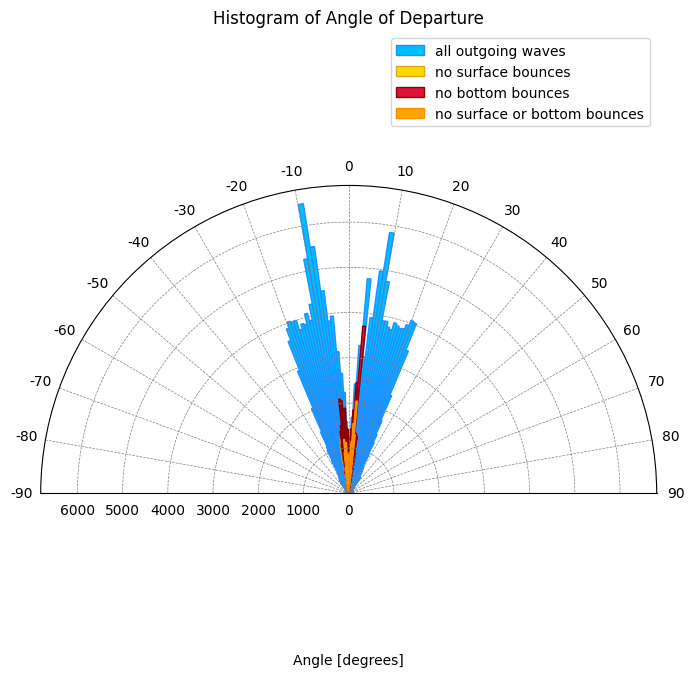

In [12]:
# sample array of angles in degrees
angles_of_departure_deg = angle_of_departure
angles_of_departure_clean_deg = angle_of_departure_clean
angles_of_departure_no_surface_deg = angle_of_departure_no_surface
angles_of_departure_no_bottom_deg = angle_of_departure_no_bottom

# convert angles to radians
angles_of_departure_rad = np.deg2rad(angles_of_departure_deg)
angles_of_departure_clean_rad = np.deg2rad(angles_of_departure_clean_deg)
angles_of_departure_no_surface_rad = np.deg2rad(angles_of_departure_no_surface_deg)
angles_of_departure_no_bottom_rad = np.deg2rad(angles_of_departure_no_bottom_deg)

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.hist(angles_of_departure_rad, bins=180, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
ax.hist(angles_of_departure_no_surface_rad, bins=180, color='gold', edgecolor='goldenrod', label='no surface bounces')
ax.hist(angles_of_departure_no_bottom_rad, bins=180, color='crimson', edgecolor='darkred', label='no bottom bounces')
ax.hist(angles_of_departure_clean_rad, bins=180, color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Angle of Departure')

# add a legend
plt.legend()

# show plot
plt.show()

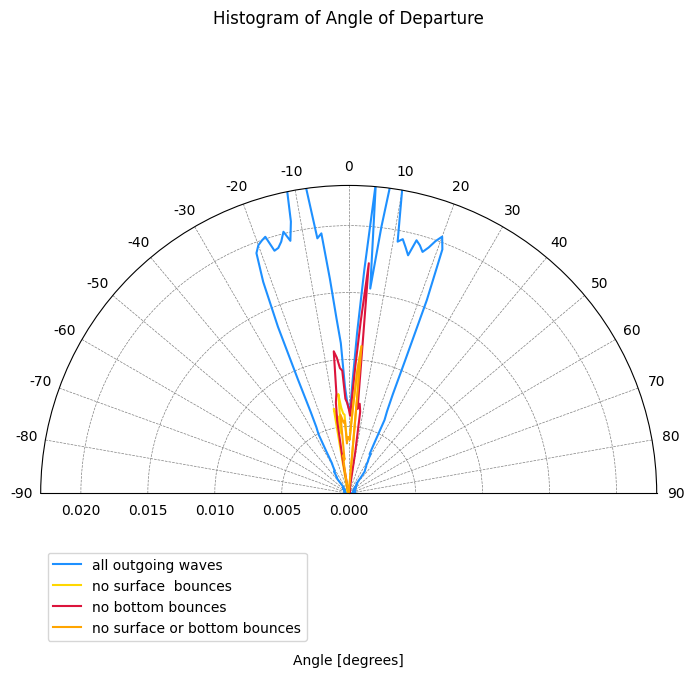

In [13]:
# define a histogram as to count the number of events
counts, bins = np.histogram(angles_of_departure_deg, bins=range(-90, 91, 1))
counts_clean, bins_clean = np.histogram(angles_of_departure_clean_deg, bins=range(-90, 91, 1))
counts_no_surface, bins_no_surface = np.histogram(angles_of_departure_no_surface_deg, bins=range(-90, 91, 1))
counts_no_bottom, bins_no_bottom = np.histogram(angles_of_departure_no_bottom_deg, bins=range(-90, 91, 1))

# count the total amount of counts
total = sum(counts)
weighted_counts = [i / total for i in counts]
weighted_counts_clean = [i / total for i in counts_clean]
weighted_counts_no_surface = [i / total for i in counts_no_surface]
weighted_counts_no_bottom = [i / total for i in counts_no_bottom]

# convert angles to radians
bins_rad = np.deg2rad(bins[:-1])
bins_clean_rad = np.deg2rad(bins_clean[:-1])
bins_no_surface_rad = np.deg2rad(bins_no_surface[:-1])
bins_no_bottom_rad = np.deg2rad(bins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.plot(bins_rad, weighted_counts, color='dodgerblue', label='all outgoing waves')
ax.plot(bins_no_surface_rad, weighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(bins_no_bottom_rad, weighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(bins_clean_rad, weighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Angle of Departure')
plt.ylim(0, 0.023)

# add a legend
plt.legend()

# show plot
plt.show()

In [14]:
# sample array of angles in degrees
arrival_angles_deg = angle_of_arrival_array
arrival_angles_clean_deg = angle_of_arrival_clean
arrival_angles_no_surface_deg = angle_of_arrival_no_surface
arrival_angles_no_bottom_deg = angle_of_arrival_no_bottom

# convert angles to radians
arrival_angles_rad = np.deg2rad(arrival_angles_deg)
arrival_angles_clean_rad = np.deg2rad(arrival_angles_clean_deg)
arrival_angles_no_surface_rad = np.deg2rad(arrival_angles_no_surface_deg)
arrival_angles_no_bottom_rad = np.deg2rad(arrival_angles_no_bottom_deg)

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.hist(arrival_angles_rad, bins=180, color='deepskyblue', edgecolor='dodgerblue', label='all incoming waves')
ax.hist(arrival_angles_no_surface_rad, bins=180, color='gold', edgecolor='goldenrod', label='no surface bounces')
ax.hist(arrival_angles_no_bottom_rad, bins=180, color='crimson', edgecolor='darkred', label='no bottom bounces')
ax.hist(arrival_angles_clean_rad, bins=180, color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Incoming Angles')

# add a legend
plt.legend()

# show plot
plt.show()

In [26]:
incoming_angles = angle_of_arrival_array[(hydrophone_distance_array < 30000) & (hydrophone_distance_array > 20000)]
incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < 30000) & (hydrophone_distance_array > 20000)]
incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_distance_array < 30000) & (hydrophone_distance_array > 20000)]
incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_distance_array < 30000) & (hydrophone_distance_array > 20000)]

# define a histogram as to count the number of events
acounts, abins = np.histogram(incoming_angles, bins=range(-90, 91, 1))
acounts_clean, abins_clean = np.histogram(incoming_angles_clean, bins=range(-90, 91, 1))
acounts_no_surface, abins_no_surface = np.histogram(incoming_angles_no_surface, bins=range(-90, 91, 1))
acounts_no_bottom, abins_no_bottom = np.histogram(incoming_angles_no_bottom, bins=range(-90, 91, 1))

# count the total amount of counts
atotal = sum(acounts)
aweighted_counts = [i / atotal for i in acounts]
aweighted_counts_clean = [i / atotal for i in acounts_clean]
aweighted_counts_no_surface = [i / atotal for i in acounts_no_surface]
aweighted_counts_no_bottom = [i / atotal for i in acounts_no_bottom]

# convert angles to radians
abins_rad = np.deg2rad(abins[:-1])
abins_clean_rad = np.deg2rad(abins_clean[:-1])
abins_no_surface_rad = np.deg2rad(abins_no_surface[:-1])
abins_no_bottom_rad = np.deg2rad(abins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
#ax.plot(abins_rad, aweighted_counts, color='dodgerblue', label='all incoming waves')
ax.plot(abins_no_surface_rad, aweighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(abins_no_bottom_rad, aweighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(abins_clean_rad, aweighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_yticks([0.0, 0.004, 0.008, 0.012, 0.016])


# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Tanganyika: Histogram of Incoming Angles (20-30 km)')
plt.ylim(0, 0.018)

# add a legend
plt.legend()
plt.savefig("polar incoming angles 20-30 Tanganyika.jpg")

# show plot
plt.show()

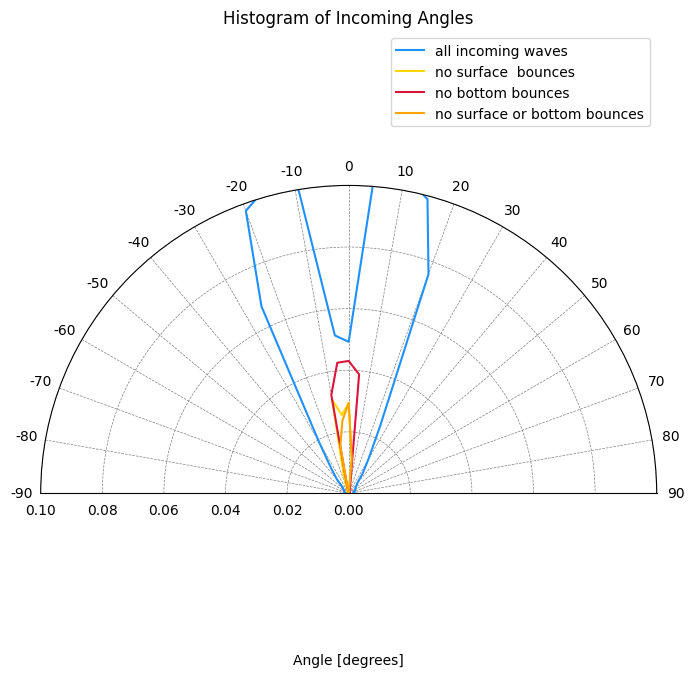

In [16]:
# define a histogram as to count the number of events
acounts, abins = np.histogram(arrival_angles_deg, bins=range(-90, 91, 5))
acounts_clean, abins_clean = np.histogram(arrival_angles_clean_deg, bins=range(-90, 95, 5))
acounts_no_surface, abins_no_surface = np.histogram(arrival_angles_no_surface_deg, bins=range(-90, 91, 5))
acounts_no_bottom, abins_no_bottom = np.histogram(arrival_angles_no_bottom_deg, bins=range(-90, 91, 5))

# count the total amount of counts
atotal = sum(acounts)
aweighted_counts = [i / atotal for i in acounts]
aweighted_counts_clean = [i / atotal for i in acounts_clean]
aweighted_counts_no_surface = [i / atotal for i in acounts_no_surface]
aweighted_counts_no_bottom = [i / atotal for i in acounts_no_bottom]

# convert angles to radians
abins_rad = np.deg2rad(abins[:-1])
abins_clean_rad = np.deg2rad(abins_clean[:-1])
abins_no_surface_rad = np.deg2rad(abins_no_surface[:-1])
abins_no_bottom_rad = np.deg2rad(abins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.plot(abins_rad, aweighted_counts, color='dodgerblue', label='all incoming waves')
ax.plot(abins_no_surface_rad, aweighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(abins_no_bottom_rad, aweighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(abins_clean_rad, aweighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Incoming Angles')
plt.ylim(0, 0.1)

# add a legend
plt.legend()

# show plot
plt.show()

# Angle dependency for exposure maps

-38.822346340858566


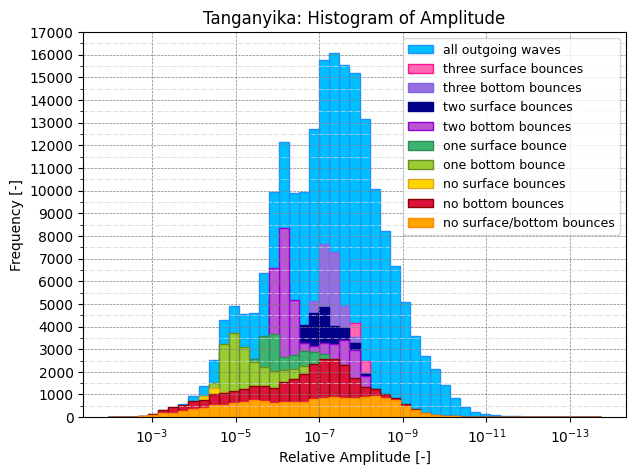

In [24]:
# Convert the complex amplitude to the absolute amplitude
signal_amplitude_com = [complex(string) for string in signal_amplitude]
amp_abs = np.abs(signal_amplitude_com)
amp_abs_dB = [20 * np.log10(i) for i in amp_abs]
amp_abs_dB_threshold = 20 * np.log10(5 * 10**3)
min_amp_uPa_dB = amp_abs_dB_threshold - amp_abs_dB
min_amp_uPa = 10**(min_amp_uPa_dB / 20)

print(max(amp_abs_dB))

amp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
amp_abs_no_surface = amp_abs[(surface_bounces_array == 0)]
amp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0)]
amp_abs_1_surface = amp_abs[(surface_bounces_array == 1)]
amp_abs_1_bottom = amp_abs[(bottom_bounces_array == 1)]
amp_abs_2_surface = amp_abs[(surface_bounces_array == 2)]
amp_abs_2_bottom = amp_abs[(bottom_bounces_array == 2)]
amp_abs_3_surface = amp_abs[(surface_bounces_array == 3)]
amp_abs_3_bottom = amp_abs[(bottom_bounces_array == 3)]

bins = np.logspace(np.log10(min(amp_abs)), np.log10(max(amp_abs)), num=50)

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(7, 5))

plt.hist(amp_abs, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(amp_abs_3_surface, bins=bins, color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(amp_abs_3_bottom, bins=bins, color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(amp_abs_2_surface, bins=bins, color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(amp_abs_2_bottom, bins=bins, color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(amp_abs_1_surface, bins=bins, color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(amp_abs_1_bottom, bins=bins, color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')



plt.hist(amp_abs_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(amp_abs_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(amp_abs_clean, bins=bins, color='orange', edgecolor='darkorange', label='no surface/bottom bounces')


# add labels and title
plt.xlabel('Relative Amplitude [-]')
plt.ylabel('Frequency [-]')
plt.title('Tanganyika: Histogram of Amplitude')

# set major and minor ticks
xmajor_tick_interval = 3
xminor_tick_interval = 1
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.xticks(range(-19, -2, xmajor_tick_interval))
plt.yticks(range(0, 17001, ymajor_tick_interval))
plt.xticks(range(-19, -2, xminor_tick_interval), minor=True)
plt.yticks(range(0, 17001, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
plt.gca().invert_xaxis()

# add log scale on x-axis
plt.xscale('log')

# add legend
plt.legend(fontsize=9, loc="upper right")
plt.savefig("Histomgram Amplitude Tanganyika.jpg")

# show plot
plt.show()

In [10]:
min_amp_uPa_clean = min_amp_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
min_amp_uPa_no_surface = min_amp_uPa[(surface_bounces_array == 0)]
min_amp_uPa_no_bottom = min_amp_uPa[(bottom_bounces_array == 0)]
min_amp_uPa_1_surface = min_amp_uPa[(surface_bounces_array == 1)]
min_amp_uPa_1_bottom = min_amp_uPa[(bottom_bounces_array == 1)]
min_amp_uPa_2_surface = min_amp_uPa[(surface_bounces_array == 2)]
min_amp_uPa_2_bottom = min_amp_uPa[(bottom_bounces_array == 2)]
min_amp_uPa_3_surface = min_amp_uPa[(surface_bounces_array == 3)]
min_amp_uPa_3_bottom = min_amp_uPa[(bottom_bounces_array == 3)]

bins = np.logspace(np.log10(min(min_amp_uPa)), np.log10(max(min_amp_uPa)), num=50)

# plot histogram of incoming angle wit
h a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(min_amp_uPa, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(min_amp_uPa_3_surface, bins=bins, color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(min_amp_uPa_3_bottom, bins=bins, color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(min_amp_uPa_2_surface, bins=bins, color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(min_amp_uPa_2_bottom, bins=bins, color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(min_amp_uPa_1_surface, bins=bins, color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(min_amp_uPa_1_bottom, bins=bins, color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')

plt.hist(min_amp_uPa_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(min_amp_uPa_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(min_amp_uPa_clean, bins=bins, color='orange', edgecolor='darkorange', label='no surface/or bottom bounces')


# add labels and title
plt.xlabel(f'Minimum Original Amplitude re 1 $\mu$Pa [$\mu$Pa]')
plt.ylabel('Frequency')
plt.title('Histogram of Amplitude')

# set major and minor ticks
xmajor_tick_interval = 3
xminor_tick_interval = 1
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.xticks(range(-19, -2, xmajor_tick_interval))
plt.yticks(range(0, 17001, ymajor_tick_interval))
plt.xticks(range(-19, -2, xminor_tick_interval), minor=True)
plt.yticks(range(0, 17001, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add log scale on x-axis
plt.xscale('log')


# add legend
plt.legend(fontsize=9)


# show plot
plt.show()

NameError: name 'min_amp_uPa' is not defined

In [7]:
# define the neutrino depths
depths = [375, 750, 1125, 1500]                                 

# create a 3x4 panelled plot
fig, axes = plt.subplots(2, 2, figsize=(11, 5.5))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):
    bins = np.logspace(np.log10(min(amp_abs)), np.log10(max(amp_abs)), num=50)

    if depth == 375:
        # filter out incoming angles for the current depth
        xamp_abs = amp_abs[hydrophone_depth_array < depth]
        xamp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
        xamp_abs_no_surface = amp_abs[(surface_bounces_array == 0) & (hydrophone_depth_array < depth)]
        xamp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
    
    else:
        # filter out pancake angles for the current depth
        xamp_abs = amp_abs[(hydrophone_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        xamp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        xamp_abs_no_surface = amp_abs[(surface_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        xamp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    #axes[row_idx, col_idx].hist(amp_abs, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(xamp_abs, bins=bins, color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(xamp_abs_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(xamp_abs_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(xamp_abs_clean, bins=bins, color='orange', edgecolor='darkorange', label='no surface/bottom bounces')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Relative Amplitude [-]')
    axes[row_idx, col_idx].set_ylabel('Frequency [-]')

    if depth == 375:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: 0-{depth}m')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: {depths[idx - 1]}-{depth}m')
        
    if depth == 1500:
        axes[row_idx, col_idx].legend(fontsize=9)
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 200
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 1201, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 1201, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # plot log axis
    axes[row_idx, col_idx].set_xscale('log')
    axes[row_idx, col_idx].invert_xaxis()

# adjust layout
plt.tight_layout()

plt.savefig("depth amplitude Tanganyika.jpg")
# show plot
plt.show()

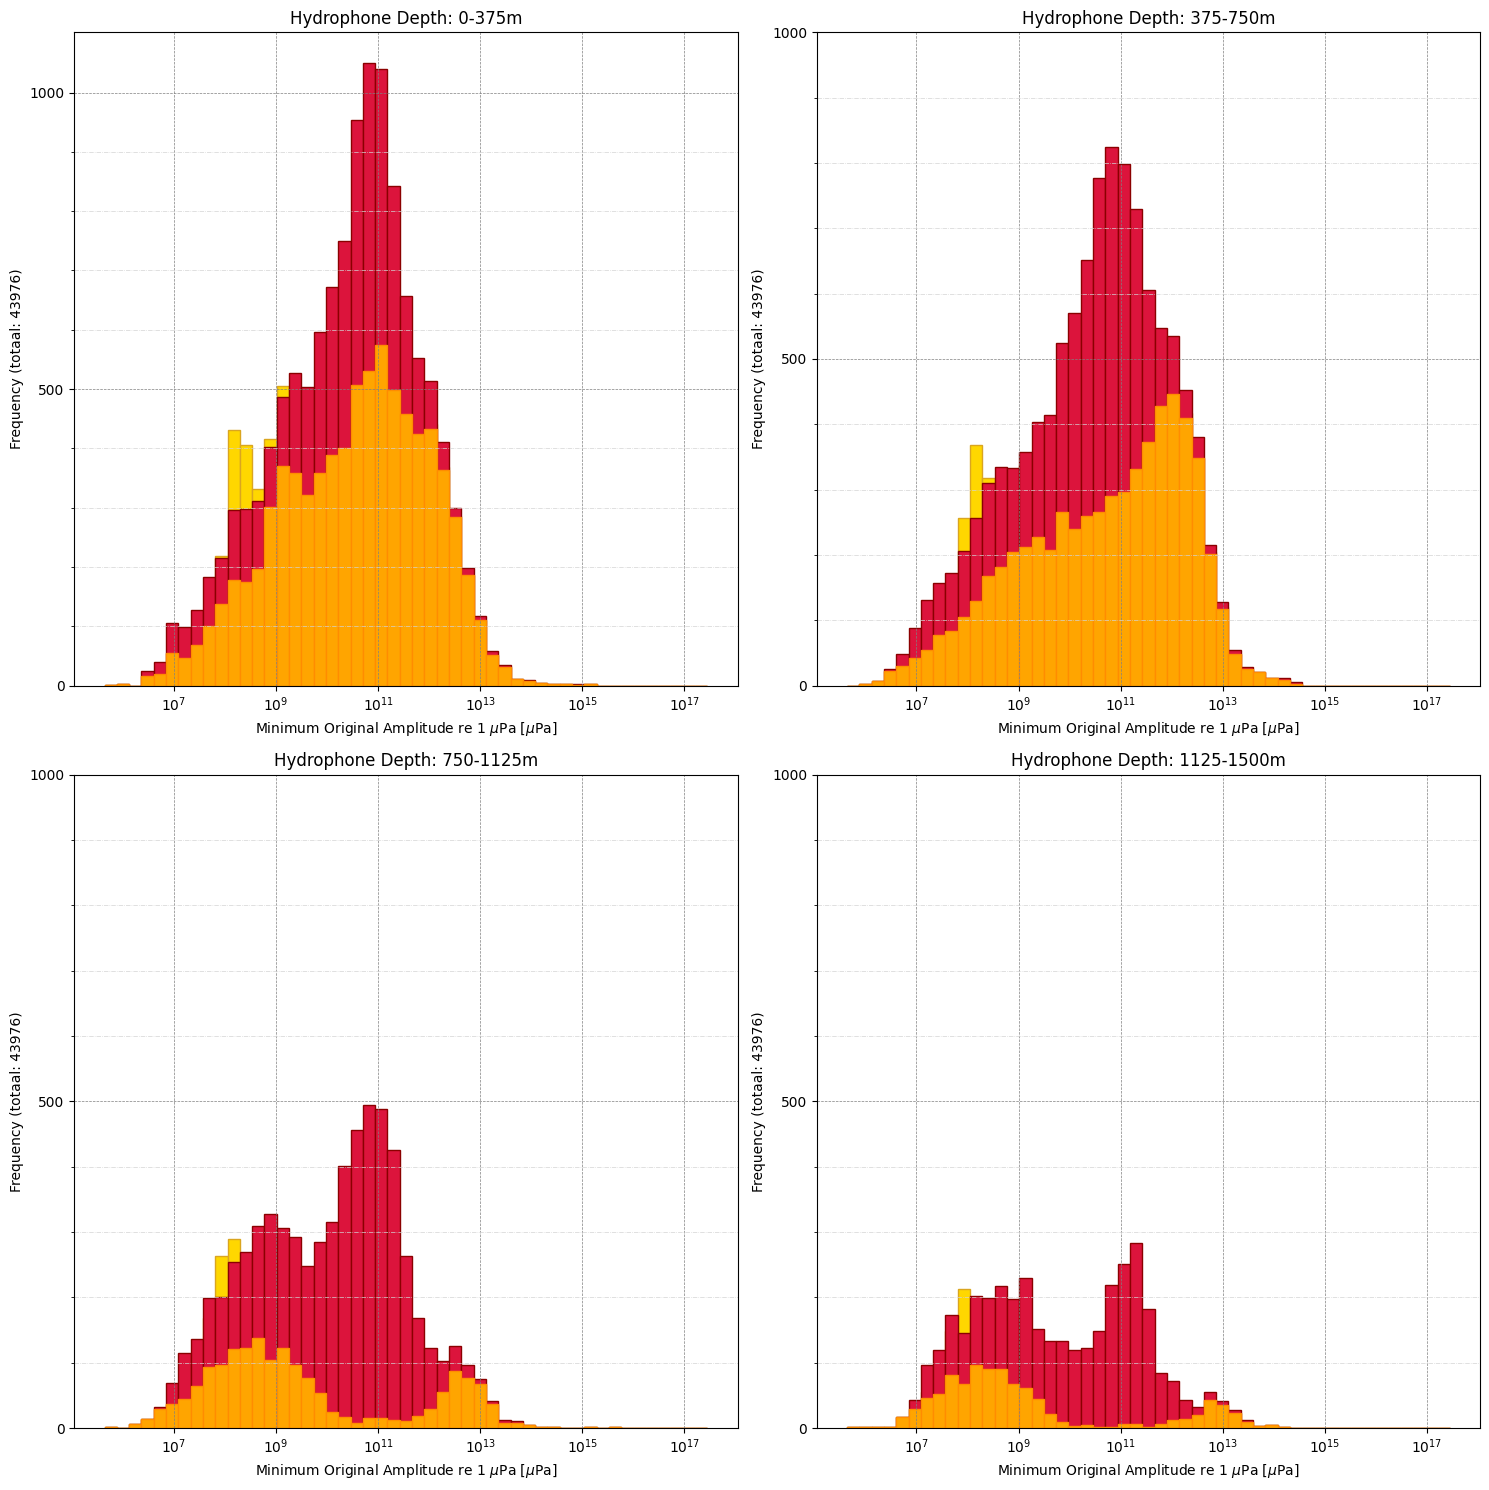

In [8]:
# define the neutrino depths
depths = [375, 750, 1125, 1500]                                 

# create a 3x4 panelled plot
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

bins = np.logspace(np.log10(min(min_amp_uPa)), np.log10(max(min_amp_uPa)), num=50)

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):

    if depth == 375:
        # filter out incoming angles for the current depth
        xmin_amp_uPa = min_amp_uPa[hydrophone_depth_array < depth]
        xmin_amp_uPa_clean = min_amp_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
        xmin_amp_uPa_no_surface = min_amp_uPa[(surface_bounces_array == 0) & (hydrophone_depth_array < depth)]
        xmin_amp_uPa_no_bottom = min_amp_uPa[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth)]
    
    else:
        # filter out pancake angles for the current depth
        xmin_amp_uPa = min_amp_uPa[(hydrophone_depth_array < depth) & (neutrino_depth_array > depths[idx - 1])]
        xmin_amp_uPa_clean = min_amp_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        xmin_amp_uPa_no_surface = min_amp_uPa[(surface_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        xmin_amp_uPa_no_bottom = min_amp_uPa[(bottom_bounces_array == 0) & (hydrophone_depth_array < depth) & (hydrophone_depth_array > depths[idx - 1])]
        
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    #axes[row_idx, col_idx].hist(amp_abs, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(xmin_amp_uPa, bins=bins, color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(xmin_amp_uPa_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(xmin_amp_uPa_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(xmin_amp_uPa_clean, bins=bins, color='orange', edgecolor='darkorange', label=f'Depth {depth}m')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel(f'Minimum Original Amplitude re 1 $\mu$Pa [$\mu$Pa]')
    axes[row_idx, col_idx].set_ylabel(f'Frequency (totaal: {len(xamp_abs)})')

    if depth == 375:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: 0-{depth}m')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Depth: {depths[idx - 1]}-{depth}m')
       
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 500
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 1001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 1001, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
    # plot log axis
    axes[row_idx, col_idx].set_xscale('log')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

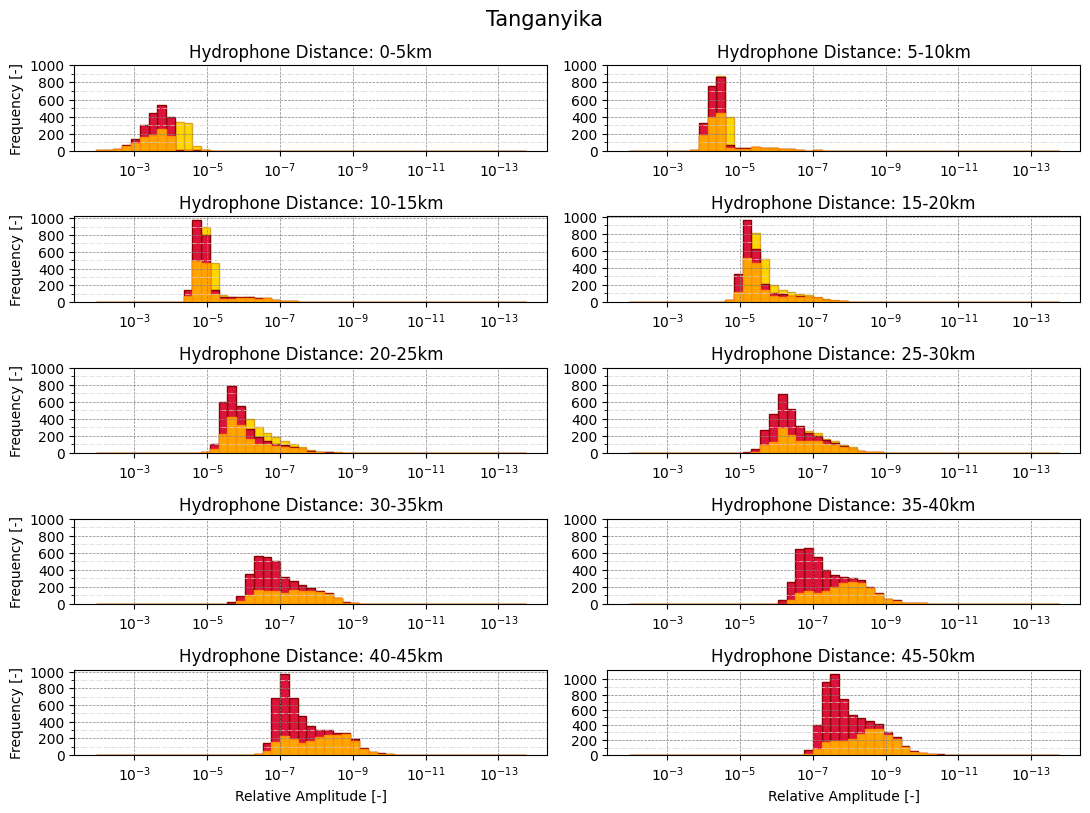

In [9]:
# define the depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(11, 8.25))

fig.suptitle('Tanganyika', fontsize=15)

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    
    if distance == 5000:
        # filter out pancake angles for the current depth
        xamp_abs = amp_abs[hydrophone_distance_array < distance]
        xamp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
        xamp_abs_no_surface = amp_abs[(surface_bounces_array == 0) & (hydrophone_distance_array < distance)]
        xamp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

    else:
        # filter out pancake angles for the current depth
        xamp_abs = amp_abs[(hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xamp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xamp_abs_no_surface = amp_abs[(surface_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xamp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2

    bins = np.logspace(np.log10(min(amp_abs)), np.log10(max(amp_abs)), num=50)

    # plot histogram of incoming angle with a binsize of 1 degree
    #axes[row_idx, col_idx].hist(amp_abs, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    #axes[row_idx, col_idx].hist(xamp_abs, bins=bins, color='blue', edgecolor='blue', label=f'10 * Distance {distance}m')
    axes[row_idx, col_idx].hist(xamp_abs_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(xamp_abs_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(xamp_abs_clean, bins=bins, color='orange', edgecolor='darkorange', label=f'Distance {distance}m')         
    
    if distance == 5000:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: 0-{round(distance/1000)}km')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: {round(distances[idx - 1]/1000)}-{round(distance/1000)}km')
        
    if distance == 50000 or distance == 45000:
        axes[row_idx, col_idx].set_xlabel('Relative Amplitude [-]')

    if distance == 5000 or distance == 15000 or distance == 25000 or distance == 35000 or distance == 45000:
        axes[row_idx, col_idx].set_ylabel('Frequency [-]')
        
    # set major and minor ticks
    xmajor_tick_interval = 3
    xminor_tick_interval = 1
    ymajor_tick_interval = 200
    yminor_tick_interval = 100
    
    axes[row_idx, col_idx].set_xticks(range(-19, -2, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 1001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-19, -2, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 1001, yminor_tick_interval), minor=True)

    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

    # plot log axis
    axes[row_idx, col_idx].set_xscale('log')
    axes[row_idx, col_idx].invert_xaxis()

# adjust layout
plt.tight_layout()
plt.savefig("distance amplitude Tanganyika.jpg")

# show plot
plt.show()

In [10]:
# define the Bjorken-y variable
y = 0.25
    
# define the translation factor following Perkin (J. Perkin, ‘The acoustic detection of ultra high energy neutrinos,’ Ph.D. dissertation, TheUniversity of Sheffield, Jan. 2008)
kv = 2.115 * 10**(-11)        # Pa per GeV
kv = 2.115 * 10**(-5)         # uPa per GeV

# calculate the minimum neutrino energy
min_E_uPa = [((i) / (y * kv)) for i in min_amp_uPa]

min_E_uPa = np.array(min_E_uPa)

print(len(min_E_uPa))

203293


In [11]:
# calculate the minimum neutrino energy
min_E_uPa = [((i * 10**(9)) / 40) for i in min_amp_uPa]

min_E_uPa = np.array(min_E_uPa)

print(len(min_E_uPa))

203293


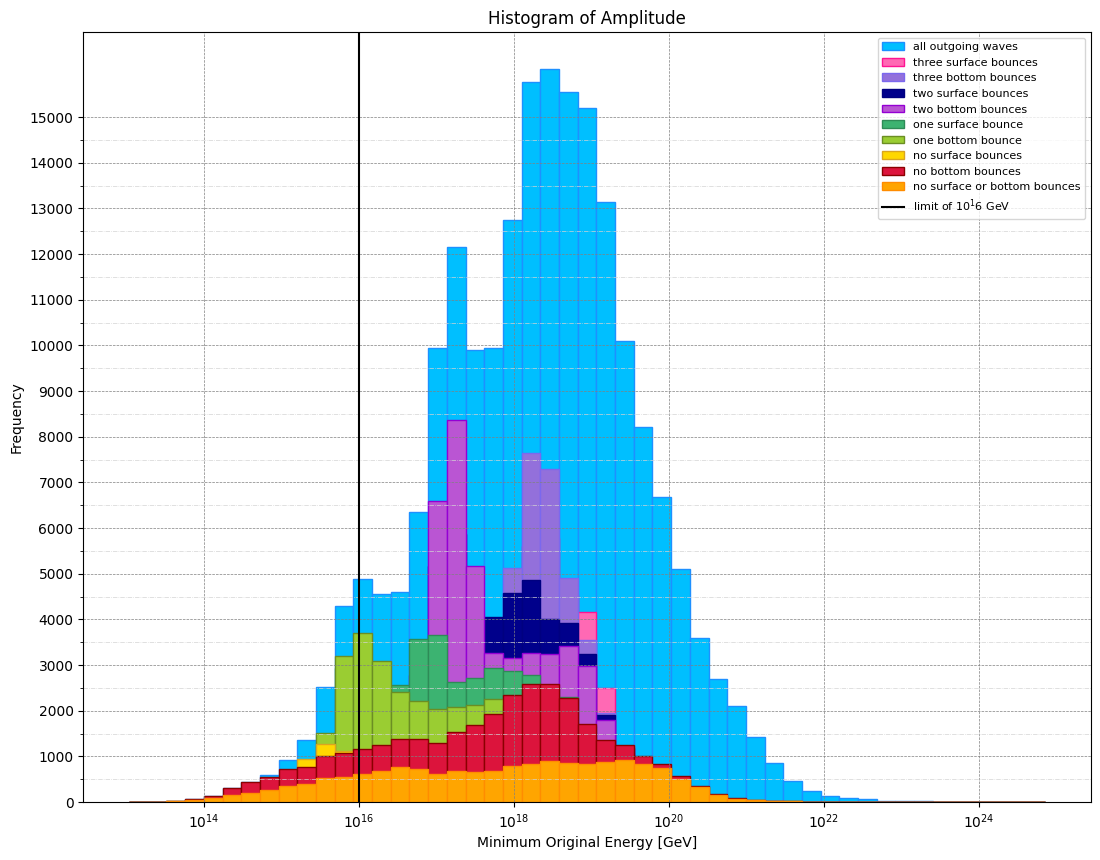

In [12]:
min_E_uPa_clean = min_E_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
min_E_uPa_no_surface = min_E_uPa[(surface_bounces_array == 0)]
min_E_uPa_no_bottom = min_E_uPa[(bottom_bounces_array == 0)]
min_E_uPa_1_surface = min_E_uPa[(surface_bounces_array == 1)]
min_E_uPa_1_bottom = min_E_uPa[(bottom_bounces_array == 1)]
min_E_uPa_2_surface = min_E_uPa[(surface_bounces_array == 2)]
min_E_uPa_2_bottom = min_E_uPa[(bottom_bounces_array == 2)]
min_E_uPa_3_surface = min_E_uPa[(surface_bounces_array == 3)]
min_E_uPa_3_bottom = min_E_uPa[(bottom_bounces_array == 3)]

bins = np.logspace(np.log10(min(min_E_uPa)), np.log10(max(min_E_uPa)), num=50)

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(min_E_uPa, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(min_E_uPa_3_surface, bins=bins, color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(min_E_uPa_3_bottom, bins=bins, color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(min_E_uPa_2_surface, bins=bins, color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(min_E_uPa_2_bottom, bins=bins, color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(min_E_uPa_1_surface, bins=bins, color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(min_E_uPa_1_bottom, bins=bins, color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
plt.hist(min_E_uPa_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(min_E_uPa_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(min_E_uPa_clean, bins=bins, color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# add labels and title
plt.xlabel(f'Minimum Original Energy [GeV]')
plt.ylabel('Frequency')
plt.title('Histogram of Amplitude')

# set major and minor ticks
xmajor_tick_interval = 3
xminor_tick_interval = 1
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.xticks(range(-26, -18, xmajor_tick_interval))
plt.yticks(range(0, 15001, ymajor_tick_interval))
plt.xticks(range(-26, -18, xminor_tick_interval), minor=True)
plt.yticks(range(0, 15001, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add log scale on x-axis
plt.xscale('log')
plt.axvline(10**16, color='black', label=f'limit of $10^{16}$ GeV')

# add legend
plt.legend(fontsize=8)

# show plot
plt.show()

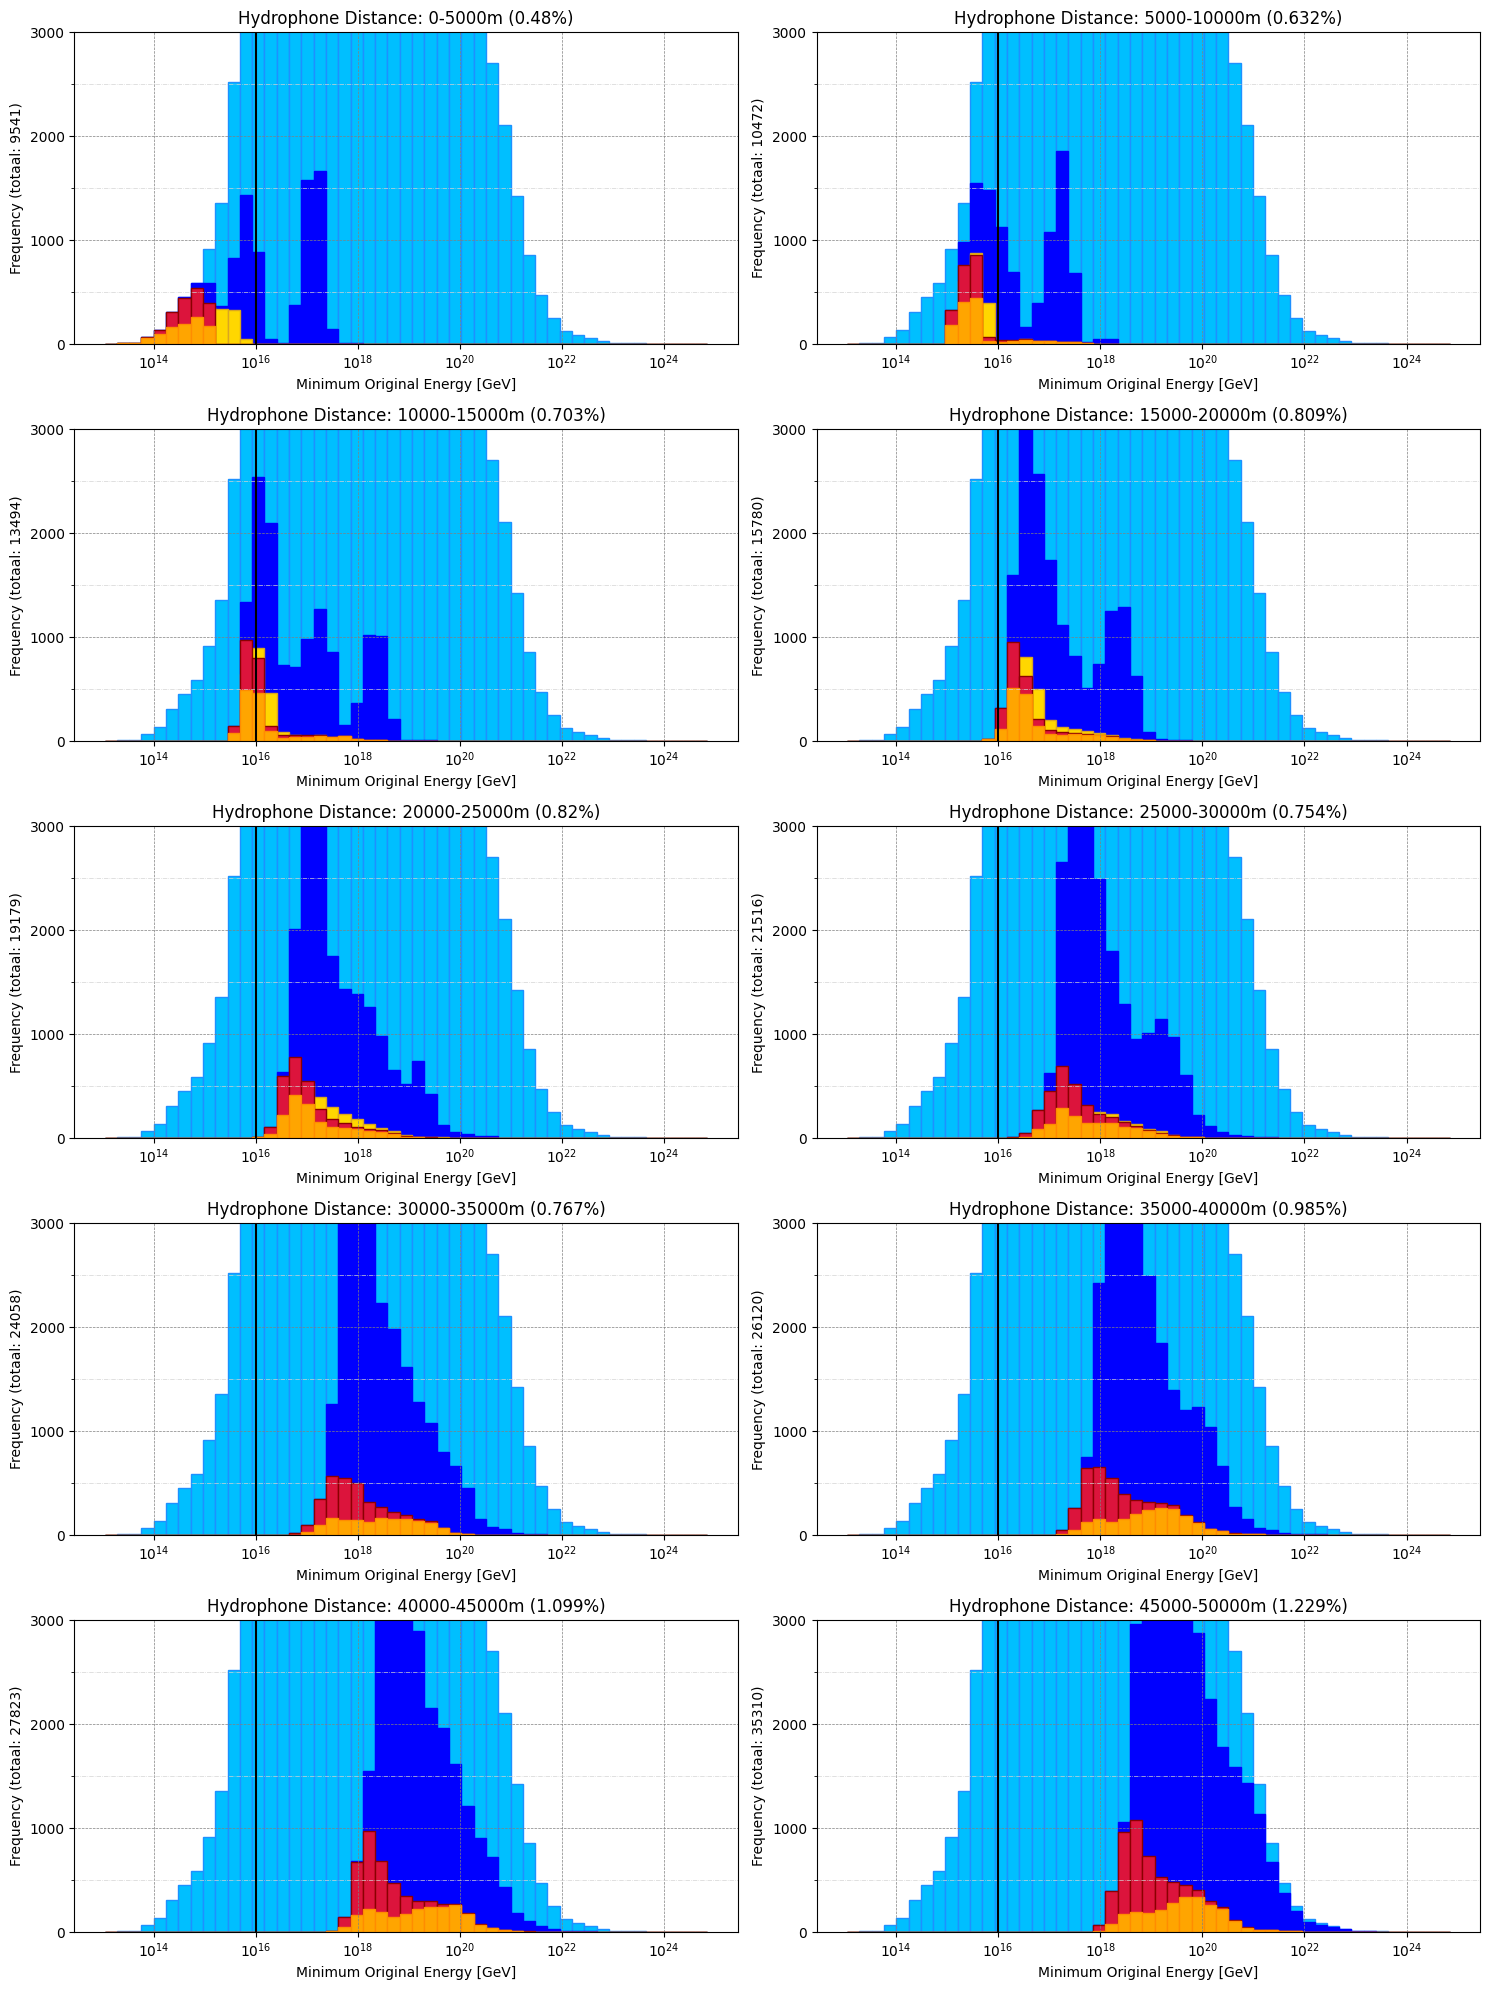

In [13]:
# define the depths
distances = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]                                

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    
    if distance == 5000:
        # filter out pancake angles for the current depth
        xmin_E_uPa = min_E_uPa[hydrophone_distance_array < distance]
        xmin_E_uPa_clean = min_E_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
        xmin_E_uPa_no_surface = min_E_uPa[(surface_bounces_array == 0) & (hydrophone_distance_array < distance)]
        xmin_E_uPa_no_bottom = min_E_uPa[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

    else:
        # filter out pancake angles for the current depth
        xmin_E_uPa = min_E_uPa[(hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xmin_E_uPa_clean = min_E_uPa[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xmin_E_uPa_no_surface = min_E_uPa[(surface_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
        xmin_E_uPa_no_bottom = min_E_uPa[(bottom_bounces_array == 0) & (hydrophone_distance_array < distance) & (hydrophone_distance_array > distances[idx - 1])]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2

    bins = np.logspace(np.log10(min(min_E_uPa)), np.log10(max(min_E_uPa)), num=50)

    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(min_E_uPa, bins=bins, color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(xmin_E_uPa, bins=bins, color='blue', edgecolor='blue', label=f'10 * Distance {distance}m')
    axes[row_idx, col_idx].hist(xmin_E_uPa_no_surface, bins=bins, color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(xmin_E_uPa_no_bottom, bins=bins, color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(xmin_E_uPa_clean, bins=bins, color='orange', edgecolor='darkorange', label=f'Distance {distance}m')         
    axes[row_idx, col_idx].axvline(10**16, color='black', label=f'limit of $10^{16}$ GeV')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel(f'Minimum Original Energy [GeV]')
    axes[row_idx, col_idx].set_ylabel(f'Frequency (totaal: {len(xmin_E_uPa)})')

    percent = (len(xmin_E_uPa_clean) / len(min_E_uPa)) * 100
    
    if distance == 5000:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: 0-{distance}m ({round(percent,3)}%)')
    else:
        axes[row_idx, col_idx].set_title(f'Hydrophone Distance: {distances[idx - 1]}-{distance}m ({round(percent,3)}%)')

    # set major and minor ticks
    xmajor_tick_interval = 3
    xminor_tick_interval = 1
    ymajor_tick_interval = 1000
    yminor_tick_interval = 500
    
    axes[row_idx, col_idx].set_xticks(range(8, 25, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 3001, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(8, 25, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 3001, yminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_ylim(0, 3000)

    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

    # plot log axis
    axes[row_idx, col_idx].set_xscale('log')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

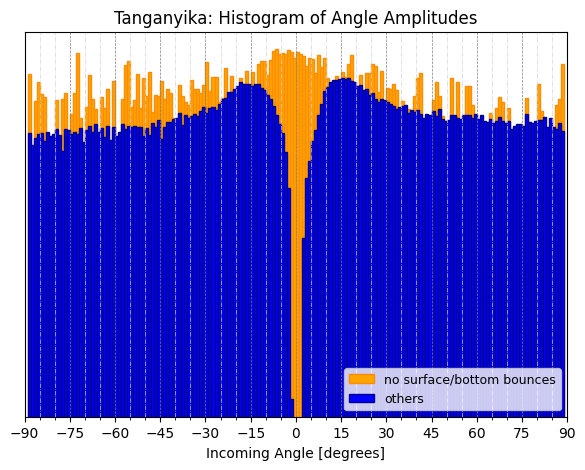

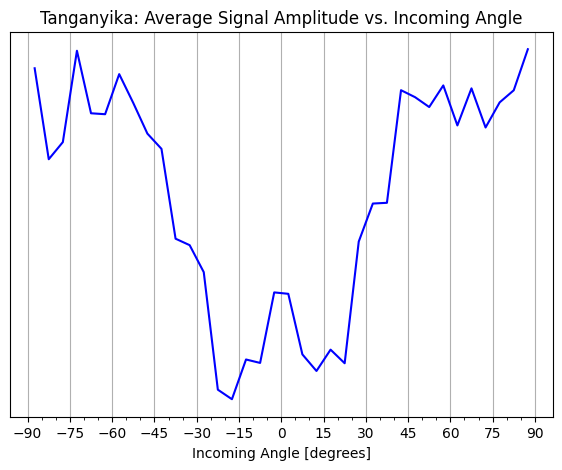

In [27]:
# convert the lists to NumPy arrays
signal_amplitude = np.array(signal_amplitude)
angle_of_arrival = np.array(angle_of_arrival)

# filter out bounces
angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]
angle_of_arrival_but = angle_of_arrival_array[(bottom_bounces_array != 0) & (surface_bounces_array != 0) ]
amp_abs_clean = amp_abs[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
amp_abs_no_surface = amp_abs[(surface_bounces_array == 0)]
amp_abs_no_bottom = amp_abs[(bottom_bounces_array == 0)]
amp_abs_but = amp_abs[(bottom_bounces_array != 0) & (surface_bounces_array != 0) ]

# define the bin edges from -89 to 89 with a bin width of 1
bins = np.arange(-90, 91)
bins1 = np.arange(-90, 91, 5)

# Use NumPy's histogram function to compute the histogram
hist, _ = np.histogram(angle_of_arrival, bins=bins, weights=amp_abs)
hist1, _ = np.histogram(angle_of_arrival, bins=bins1, weights=amp_abs)

plt.figure(figsize=(7, 5))
#plt.hist(angle_of_arrival, bins=bins, weights=amp_abs, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
#plt.hist(angle_of_arrival_no_surface, bins=bins, weights=amp_abs_no_surface, color='gold', edgecolor='goldenrod', label='no surface bounces')
#plt.hist(angle_of_arrival_no_bottom, bins=bins, weights=amp_abs_no_bottom, color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_arrival_clean, bins=bins, weights=amp_abs_clean, color='orange', edgecolor='darkorange', label='no surface/bottom bounces')
plt.hist(angle_of_arrival_but, bins=bins, weights=amp_abs_but, color='blue', edgecolor='darkblue', label='others')

# add labels and title
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Total Amplitude per Angle [-]')
plt.title('Tanganyika: Histogram of Angle Amplitudes')

# set major and minor ticks
xmajor_tick_interval = 15
xminor_tick_interval = 5
ymajor_tick_interval = 0.002
yminor_tick_interval = 0.001

plt.xticks(range(-90, 91, xmajor_tick_interval))
#plt.yticks(range(0, 0.01, ymajor_tick_interval ))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
#plt.yticks(range(0, 0.01, yminor_tick_interval), minor=True)
plt.yscale("log")

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
plt.gca().yaxis.set_visible(False)

# add x limits
plt.xlim(-90, 90)

# add legend
plt.legend(fontsize=9, loc="lower right")

plt.savefig("Total Amplitude Tanganyika.jpg")

# show plot
plt.show()

#########################################################################################################################################################

plt.figure(figsize=(7, 5))

# compute the average amplitude for each bin
bin_counts, _ = np.histogram(angle_of_arrival, bins=bins1)

average_amplitudes = np.divide(hist1, bin_counts, out=np.zeros_like(hist1), where=bin_counts!=0)

# plot the average amplitudes against the angles
bin_centers = 0.5 * (bins1[:-1] + bins1[1:])
plt.plot(bin_centers, average_amplitudes, color='blue')
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Average Signal Amplitude [-]')
plt.title('Tanganyika: Average Signal Amplitude vs. Incoming Angle')
plt.grid(True)
plt.yscale("log")
plt.xticks(range(-90, 91, xmajor_tick_interval))
#plt.yticks(range(0, 0.015, ymajor_tick_interval ))
plt.gca().yaxis.set_visible(False)
plt.ylabel('Average Signal Amplitude [-]')
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
#plt.yticks(range(0, 0.015, yminor_tick_interval), minor=True)
plt.savefig("Average Amplitude Tanganyika.jpg")
plt.show()

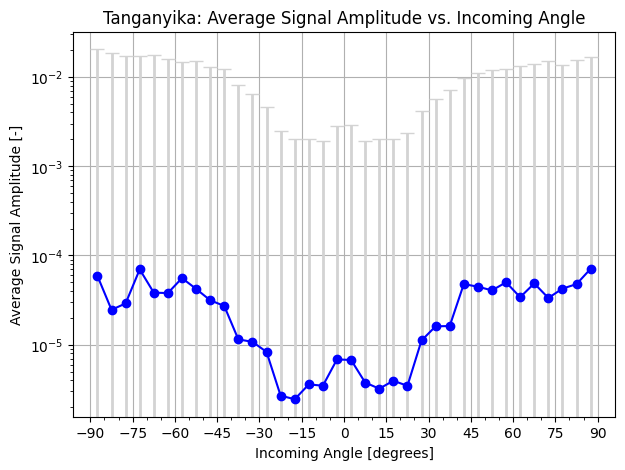

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the average amplitudes
average_amplitudes = np.divide(hist1, bin_counts, out=np.zeros_like(hist1), where=bin_counts!=0)

# Compute standard deviations for the bins (assuming you have data for each angle)
# For demonstration, random data is used. Replace with actual amplitude data.
amplitudes_per_bin = [np.random.rand(count) for count in bin_counts]
std_devs = np.array([np.std(amplitudes) for amplitudes in amplitudes_per_bin])

# Calculate standard error (optional, based on standard deviation)
standard_errors = std_devs / np.sqrt(bin_counts)

# Define bin centers for plotting
bin_centers = 0.5 * (bins1[:-1] + bins1[1:])

plt.figure(figsize=(7, 5))

# Plot with error bars
plt.errorbar(bin_centers, average_amplitudes, yerr=standard_errors, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=5)
plt.plot(bin_centers, average_amplitudes, color='blue')

plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Average Signal Amplitude [-]')
plt.title('Tanganyika: Average Signal Amplitude vs. Incoming Angle')
plt.grid(True)
plt.yscale("log")
plt.xticks(range(-90, 91, 15))  # Adjust major tick interval
#plt.gca().yaxis.set_visible(False)  # Hide y-axis scale
plt.ylabel('Average Signal Amplitude [-]')
plt.xticks(range(-90, 91, 5), minor=True)  # Adjust minor tick interval
plt.savefig("Average_Amplitude_Tanganyika.jpg")
plt.show()


In [ ]:
# Initialize a list of lists to hold the amplitudes for each bin
amplitudes_per_bin = [[] for _ in range(len(bins1) - 1)]

# Assign amplitudes to the correct bins
for angle, amplitude in zip(angle_of_arrival_clean, amp_abs_clean):
    bin_index = np.digitize(angle, bins1) - 1
    if 0 <= bin_index < len(amplitudes_per_bin):
        amplitudes_per_bin[bin_index].append(amplitude)

bin_counts, _ = np.histogram(angle_of_arrival_clean, bins=bins1)

# Calculate the average amplitudes
average_amplitudes = np.array([np.mean(bin) if bin else 0 for bin in amplitudes_per_bin])
# Compute standard deviations for the bins
std_devs = np.array([np.std(bin) if bin else 0 for bin in amplitudes_per_bin])

# Calculate standard error (optional, based on standard deviation)
standard_errors = std_devs / np.sqrt(bin_counts)

# Define bin centers for plotting
bin_centers = 0.5 * (bins1[:-1] + bins1[1:])

plt.figure(figsize=(7, 5))

# Plot with error bars
plt.errorbar(bin_centers, average_amplitudes, yerr=standard_errors, fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=5)
plt.plot(bin_centers, average_amplitudes, color='blue')
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Average Signal Amplitude [-]')
plt.title('Tanganyika: Average Signal Amplitude vs. Incoming Angle Clean')
plt.grid(True)
plt.yscale("log")
plt.xticks(range(-90, 91, 15))  # Adjust major tick interval
#plt.gca().yaxis.set_visible(False)  # Hide y-axis scale
plt.gca().yaxis.set_ticks([])
plt.xticks(range(-90, 91, 3), minor=True)  # Adjust minor tick interval
plt.savefig("Average_Amplitude_Tanganyika.jpg")
plt.show()


In [94]:
wow0 = neutrino_depth_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
wow2 = hydrophone_distance_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
wow3 = angle_of_departure_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]
wow4 = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array < distance)]

639355
